# BANK MARKETING
- Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.


In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
train_df = pd.read_csv("termdeposit_train.csv")
test_df = pd.read_csv("termdeposit_test.csv")
print("Successfully Imported Data!")


Successfully Imported Data!


In [3]:
train_df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [4]:
train_df.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31637,20110,44,technician,married,secondary,no,5163,no,no,cellular,11,aug,48,2,-1,0,unknown,no
31638,16309,29,blue-collar,married,secondary,no,721,yes,no,cellular,23,jul,644,1,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [5]:
test_df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [6]:
test_df.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13554,11568,51,unemployed,married,secondary,no,-267,no,yes,unknown,19,jun,208,2,-1,0,unknown
13555,23487,34,management,single,tertiary,no,1070,no,no,cellular,28,aug,91,15,-1,0,unknown
13556,27122,46,self-employed,married,primary,no,3155,yes,no,cellular,21,nov,271,1,-1,0,unknown
13557,837,30,services,single,secondary,no,-174,yes,no,unknown,7,may,113,1,-1,0,unknown
13558,35237,32,technician,single,secondary,no,129,yes,no,cellular,7,may,213,1,-1,0,unknown
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


# Starting the EDA

In [7]:
# Checking dimension of Datas
train_df.shape

(31647, 18)

- Train data contains 31647 rows and 18 columns

In [9]:
test_df.shape

(13564, 17)

- This dataset contains 13564 rows and 17 columns 

In [10]:
# Checking data type
train_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [11]:
# Checking data type
test_df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [12]:
# Checking for null values if any
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [13]:
# Checking for null values if any
test_df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

- No Null Values are present in train and test data

<AxesSubplot:>

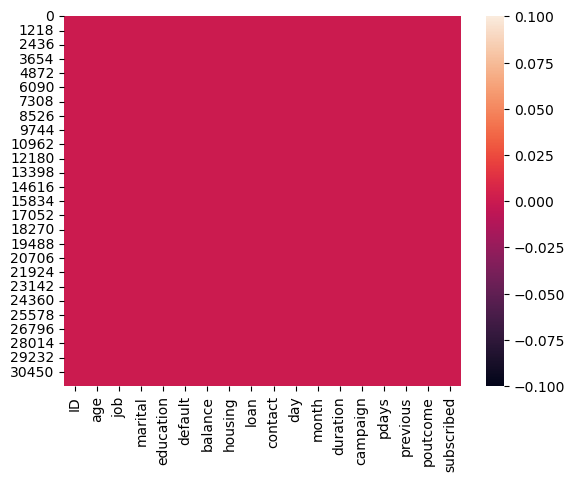

In [14]:
sns.heatmap(train_df.isnull())

<AxesSubplot:>

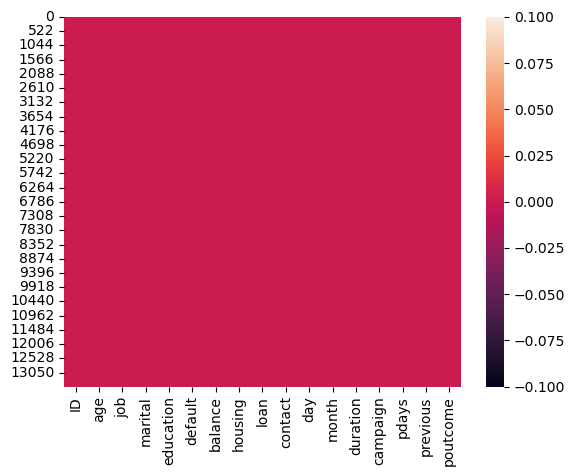

In [15]:
sns.heatmap(test_df.isnull())

In [16]:
train_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [17]:
test_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

# Data Visualization

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


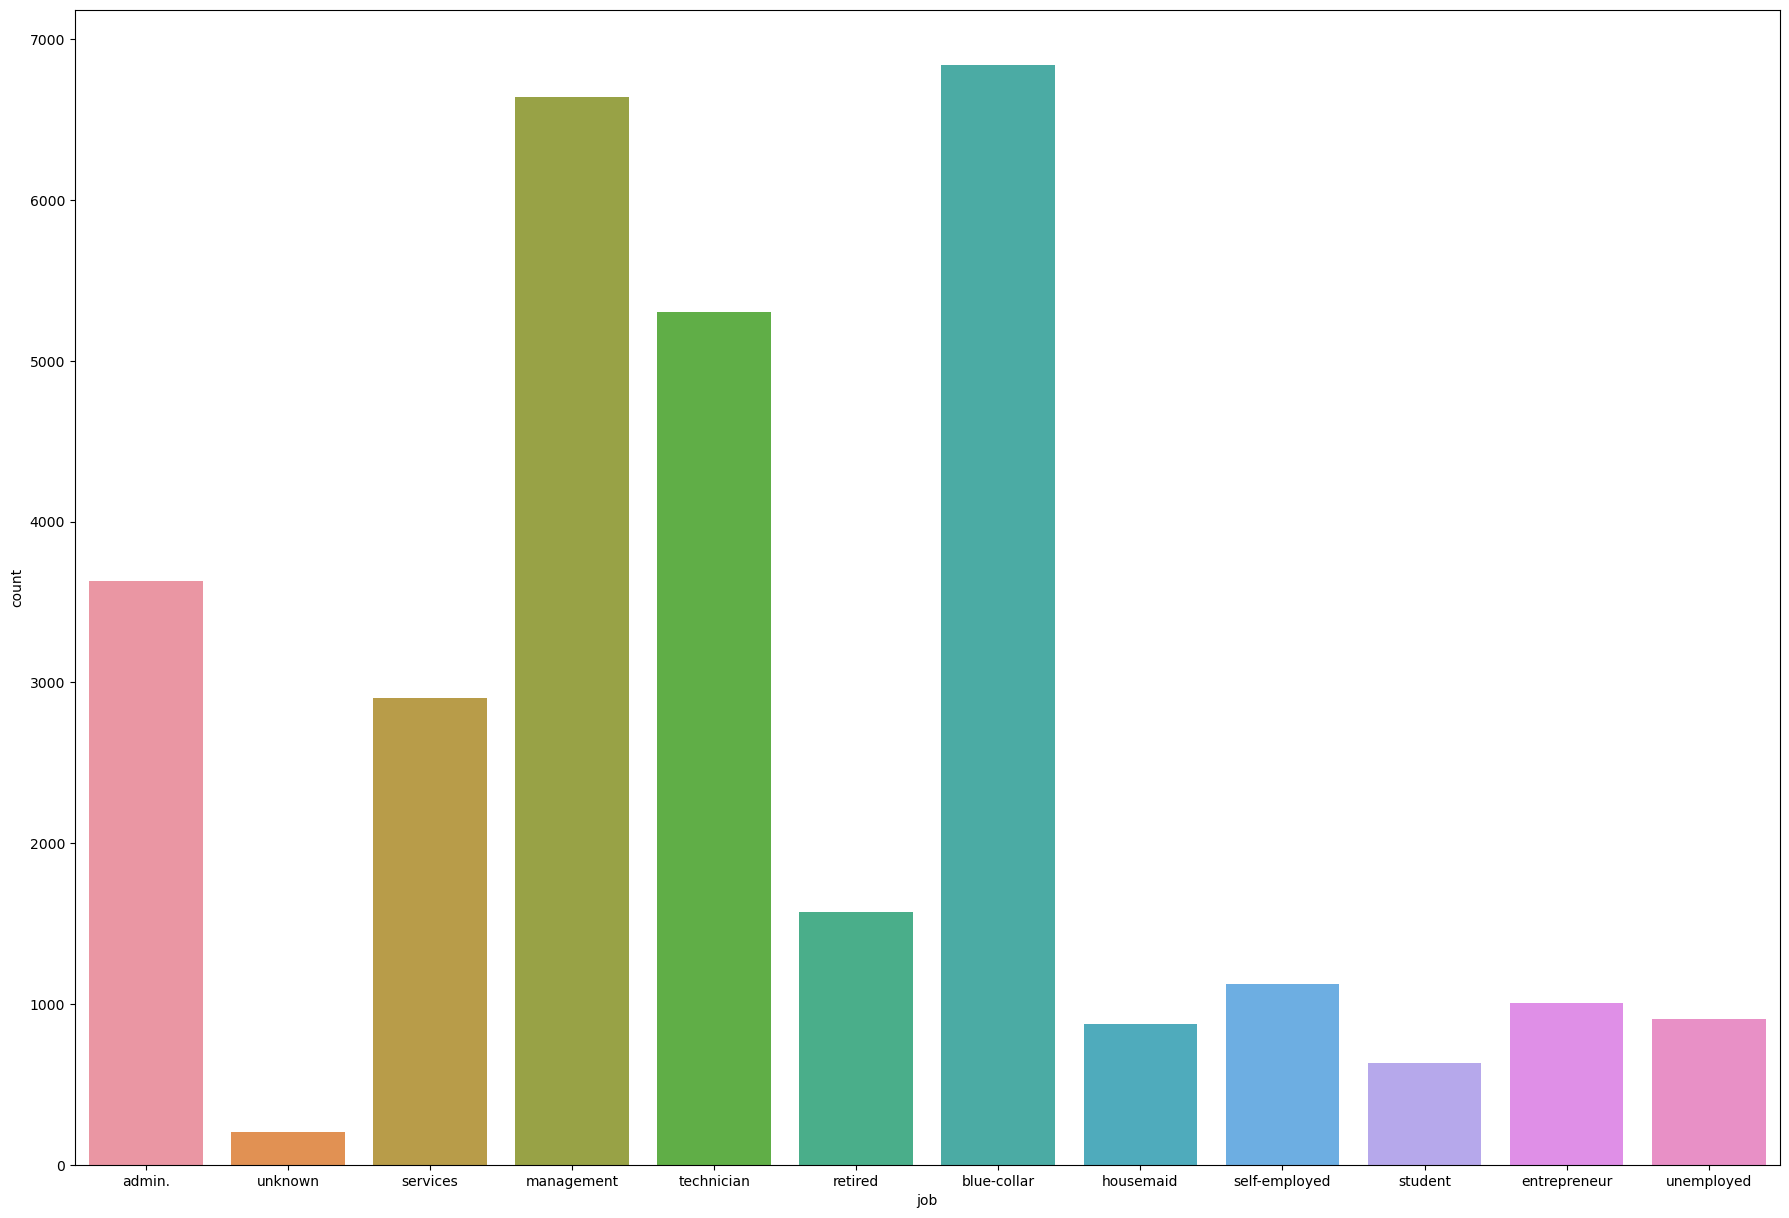

In [18]:
#visualization of data
plt.figure(figsize=(22,15))
ax=sns.countplot(x='job', data=train_df)
print(train_df["job"].value_counts())

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


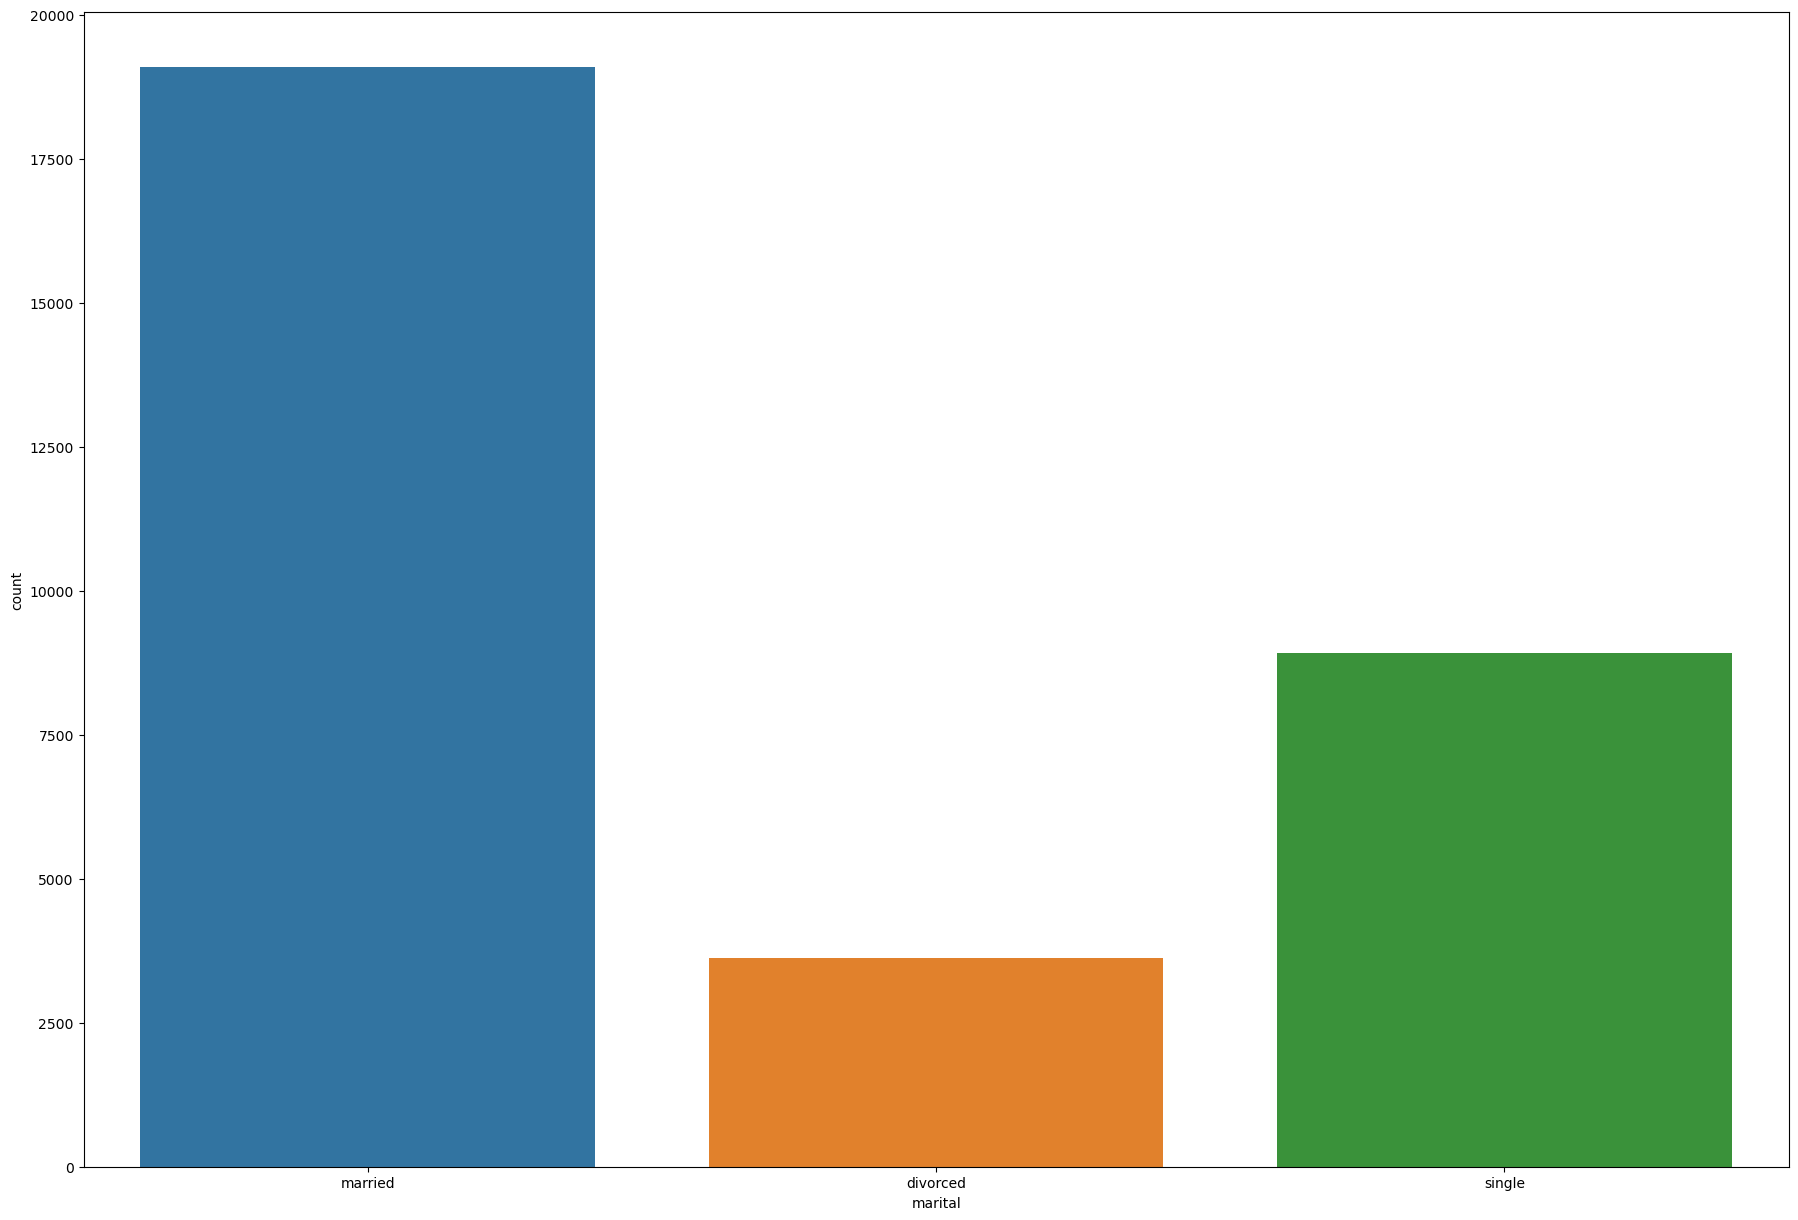

In [19]:
plt.figure(figsize=(22,15))
ax=sns.countplot(x='marital', data=train_df)
print(train_df["marital"].value_counts())

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


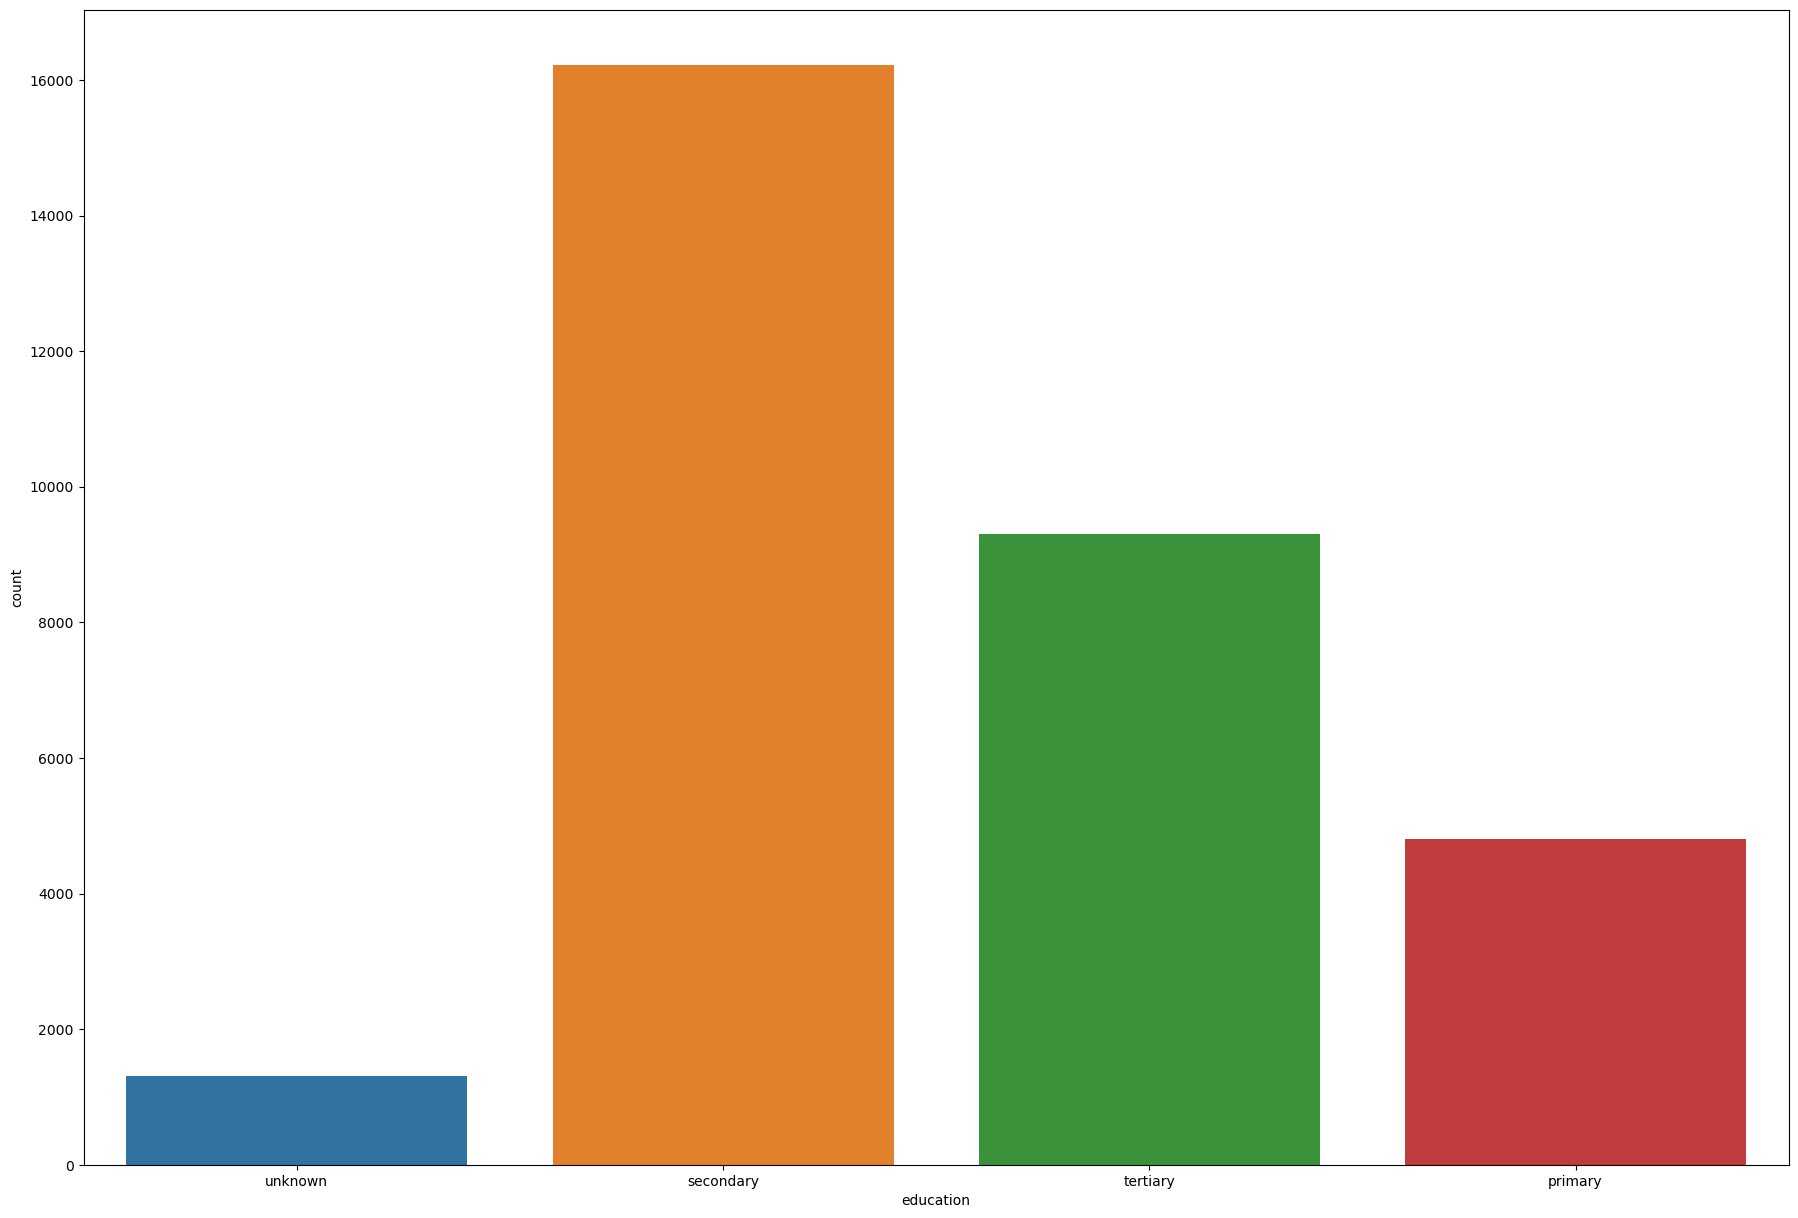

In [20]:
plt.figure(figsize=(22,15))
ax=sns.countplot(x='education', data=train_df)
print(train_df["education"].value_counts())

yes    17584
no     14063
Name: housing, dtype: int64


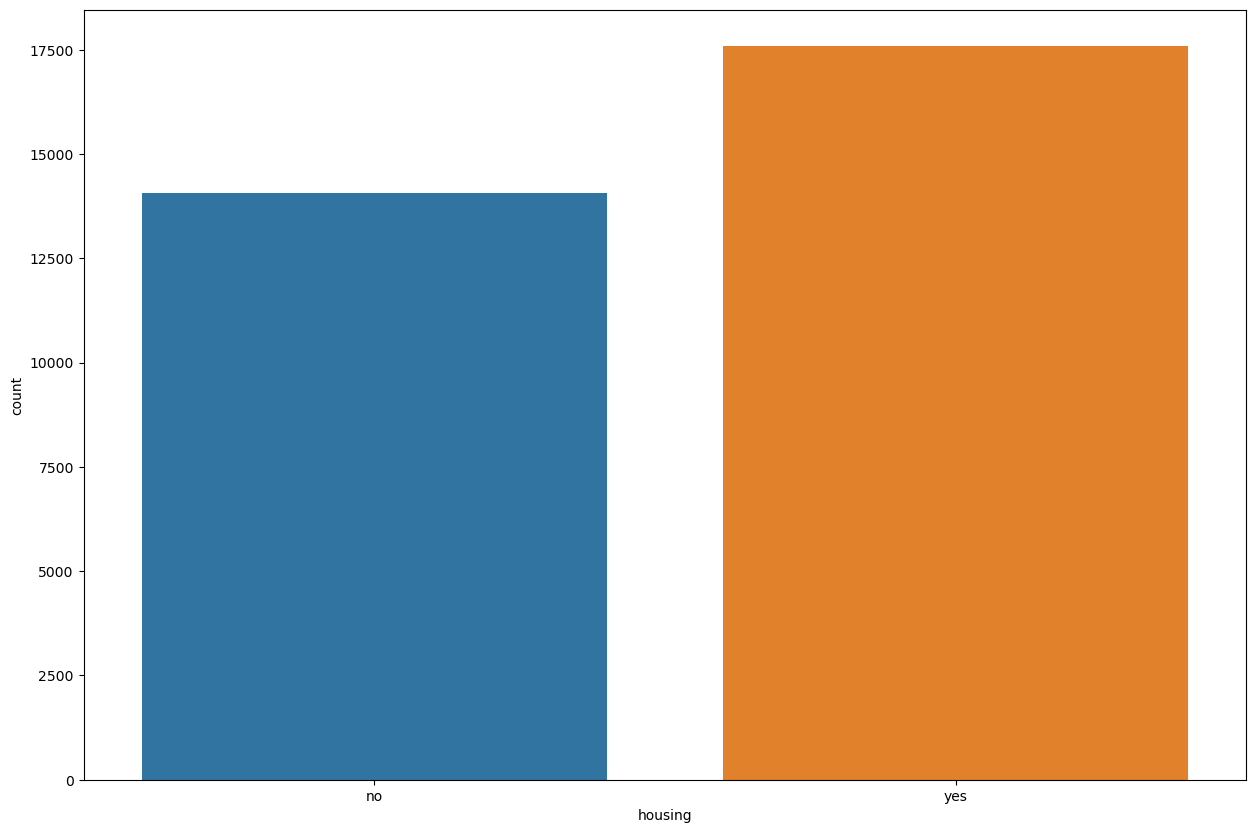

In [30]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='housing', data=train_df)
print(train_df["housing"].value_counts())

no     26516
yes     5131
Name: loan, dtype: int64


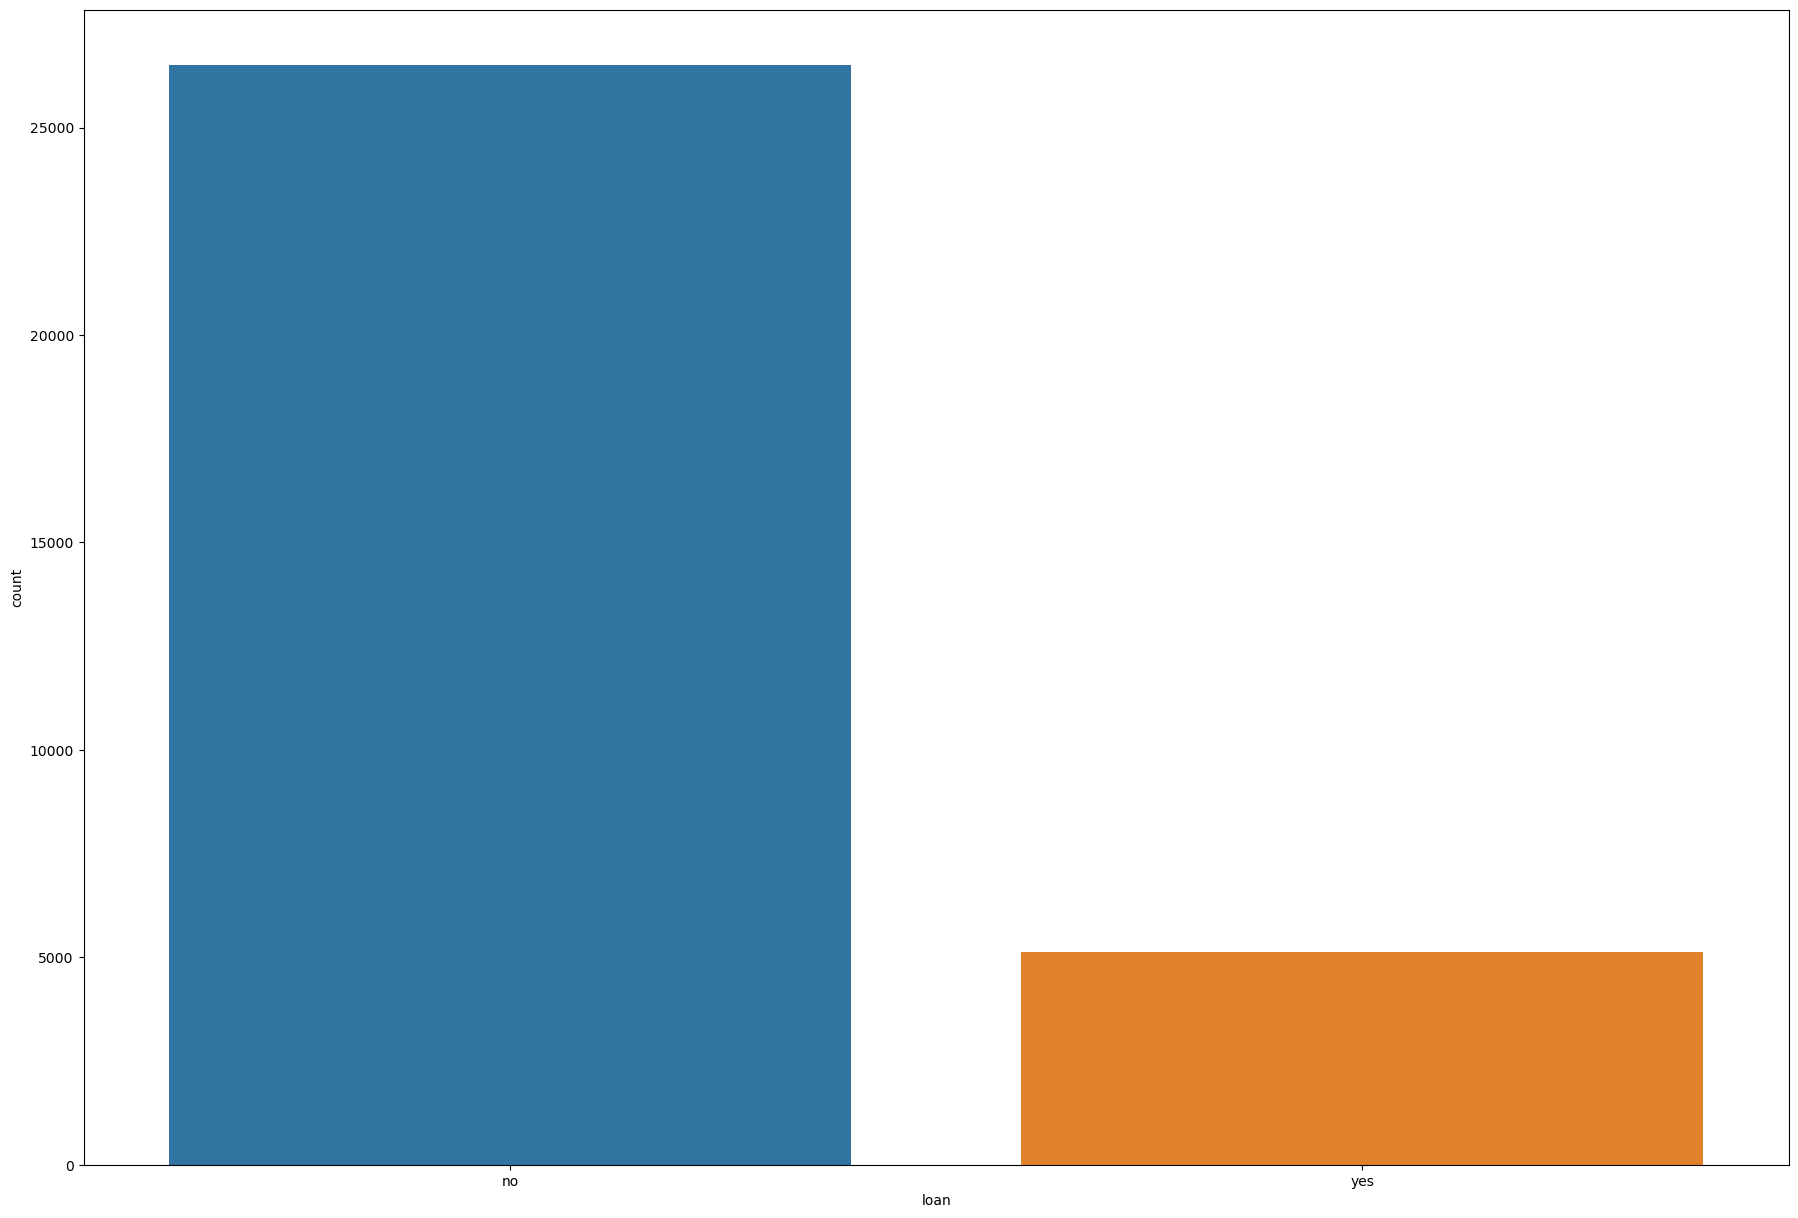

In [22]:
plt.figure(figsize=(22,15))
ax=sns.countplot(x='loan', data=train_df)
print(train_df["loan"].value_counts())

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


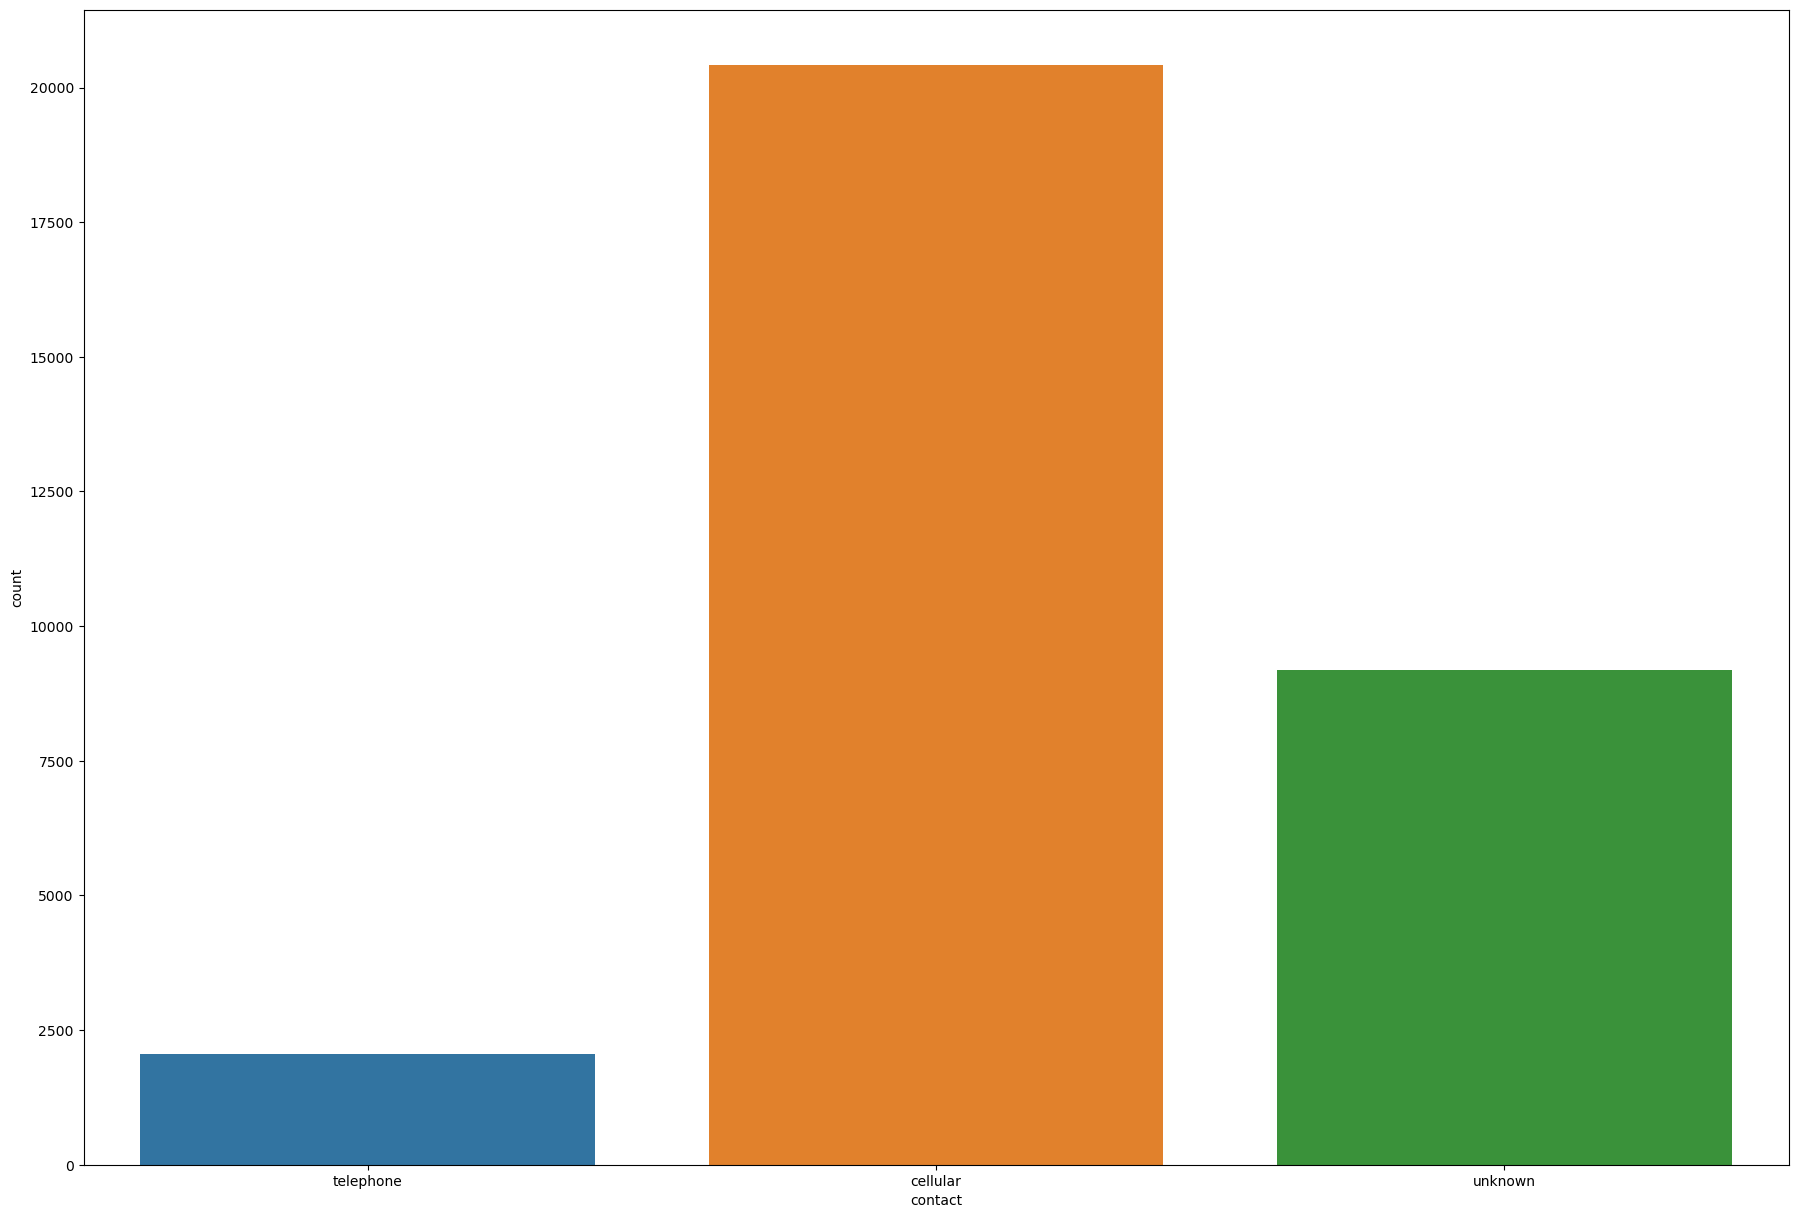

In [23]:
plt.figure(figsize=(22,15))
ax=sns.countplot(x='contact', data=train_df)
print(train_df["contact"].value_counts())

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


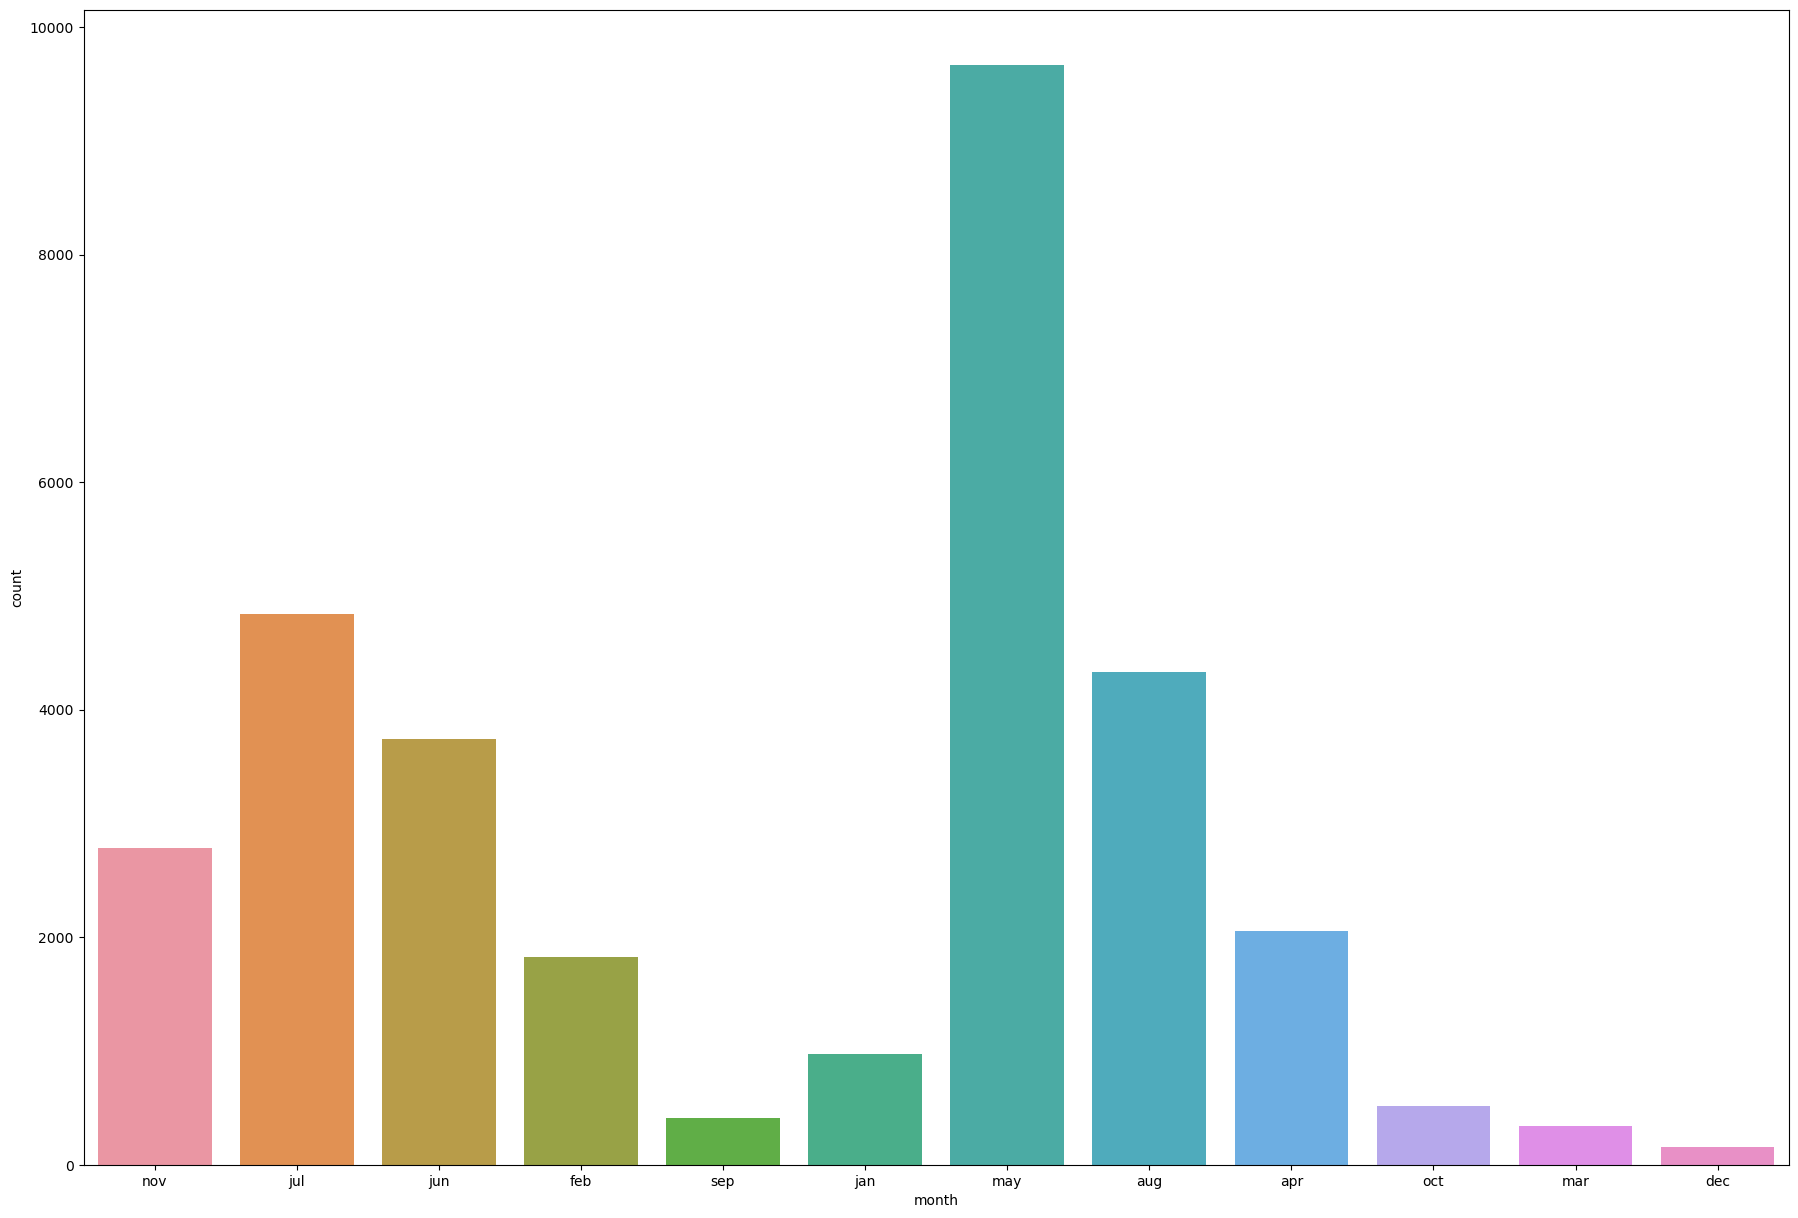

In [24]:
plt.figure(figsize=(22,15))
ax=sns.countplot(x='month', data=train_df)
print(train_df["month"].value_counts())

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


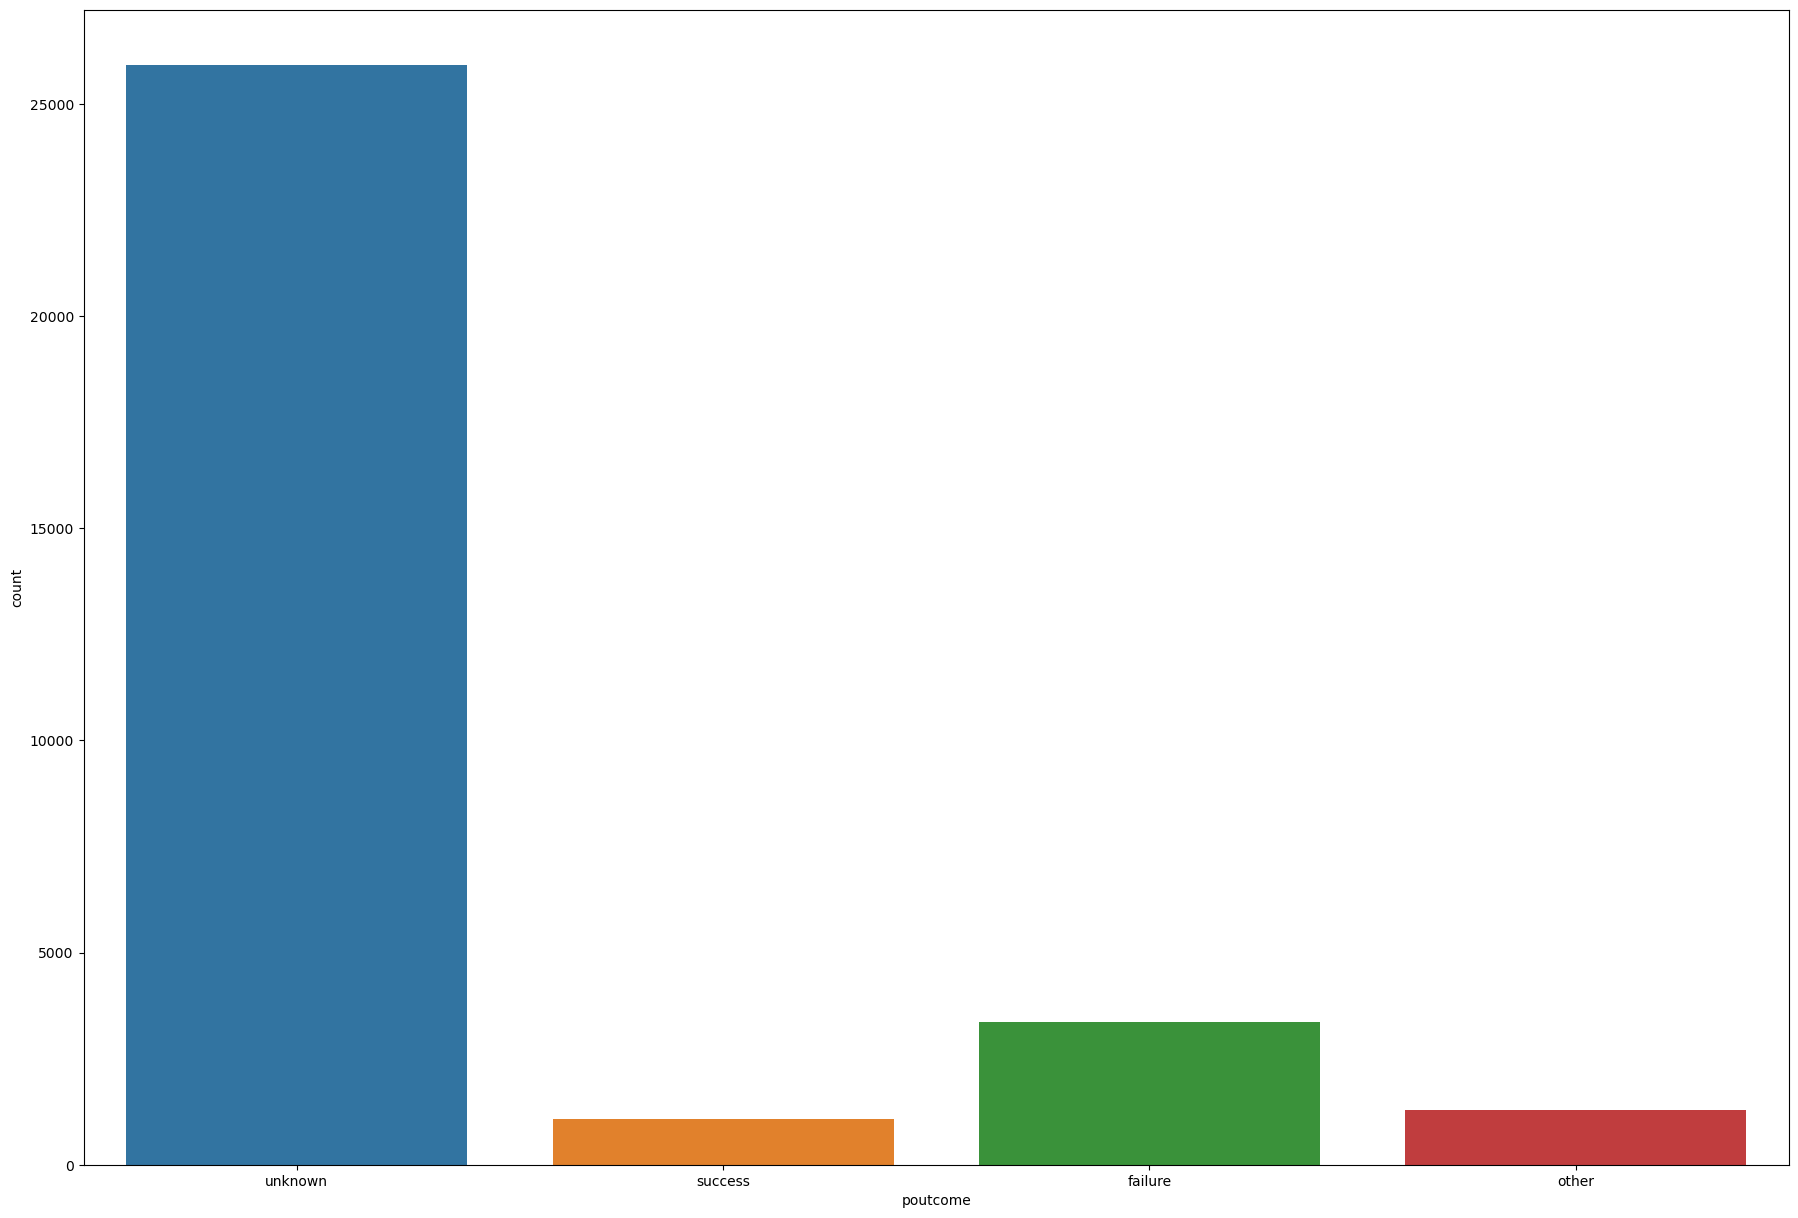

In [26]:
plt.figure(figsize=(22,15))
ax=sns.countplot(x='poutcome', data=train_df)
print(train_df["poutcome"].value_counts())

<AxesSubplot:xlabel='subscribed', ylabel='count'>

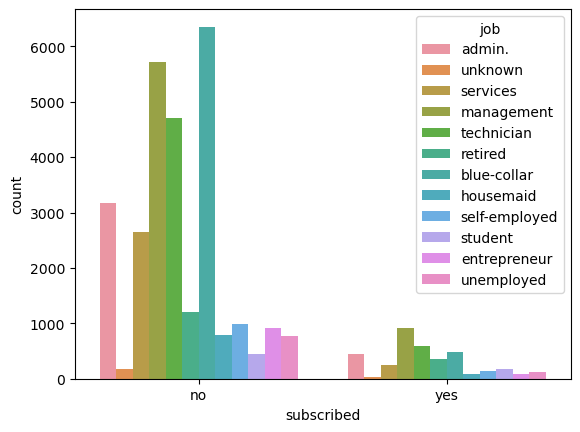

In [27]:
sns.countplot(x="subscribed", data=train_df,hue='job')

<AxesSubplot:xlabel='subscribed', ylabel='count'>

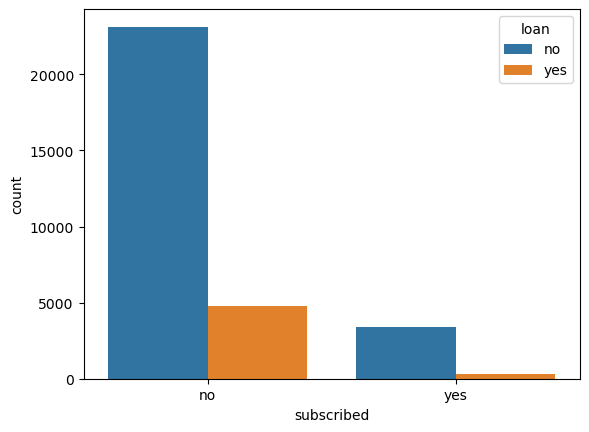

In [28]:
sns.countplot(x="subscribed", data=train_df,hue='loan')

<AxesSubplot:xlabel='subscribed', ylabel='count'>

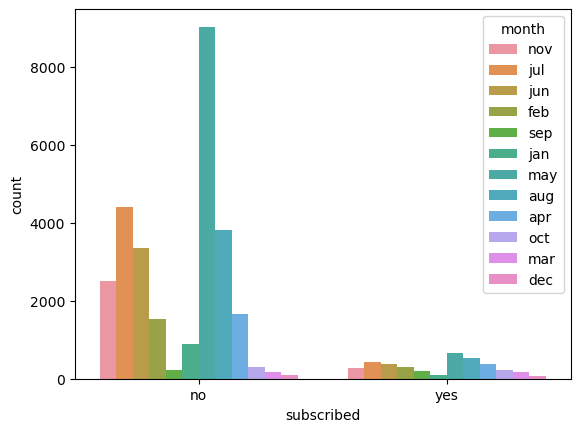

In [29]:
sns.countplot(x="subscribed", data=train_df,hue='month')

<AxesSubplot:xlabel='subscribed', ylabel='count'>

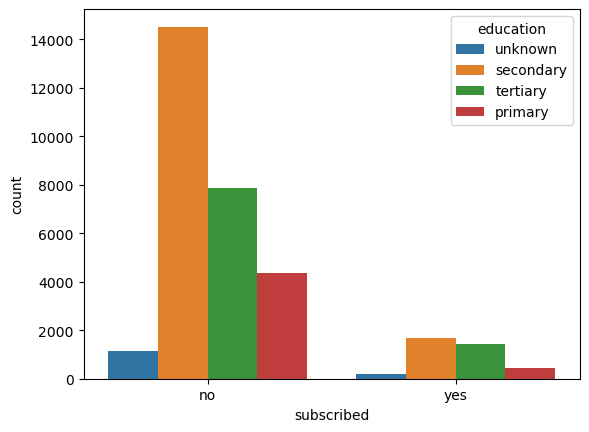

In [31]:
sns.countplot(x="subscribed", data=train_df,hue='education')

# Converting categorical data into numerical data Using LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['job','marital','education','default','housing','loan','contact','month','pdays','poutcome','subscribed']

In [34]:
train_df[cols] = train_df[cols].apply(LabelEncoder().fit_transform)

In [35]:
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,0,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,0,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,0,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,79,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,0,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,0,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,0,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,332,12,0,0


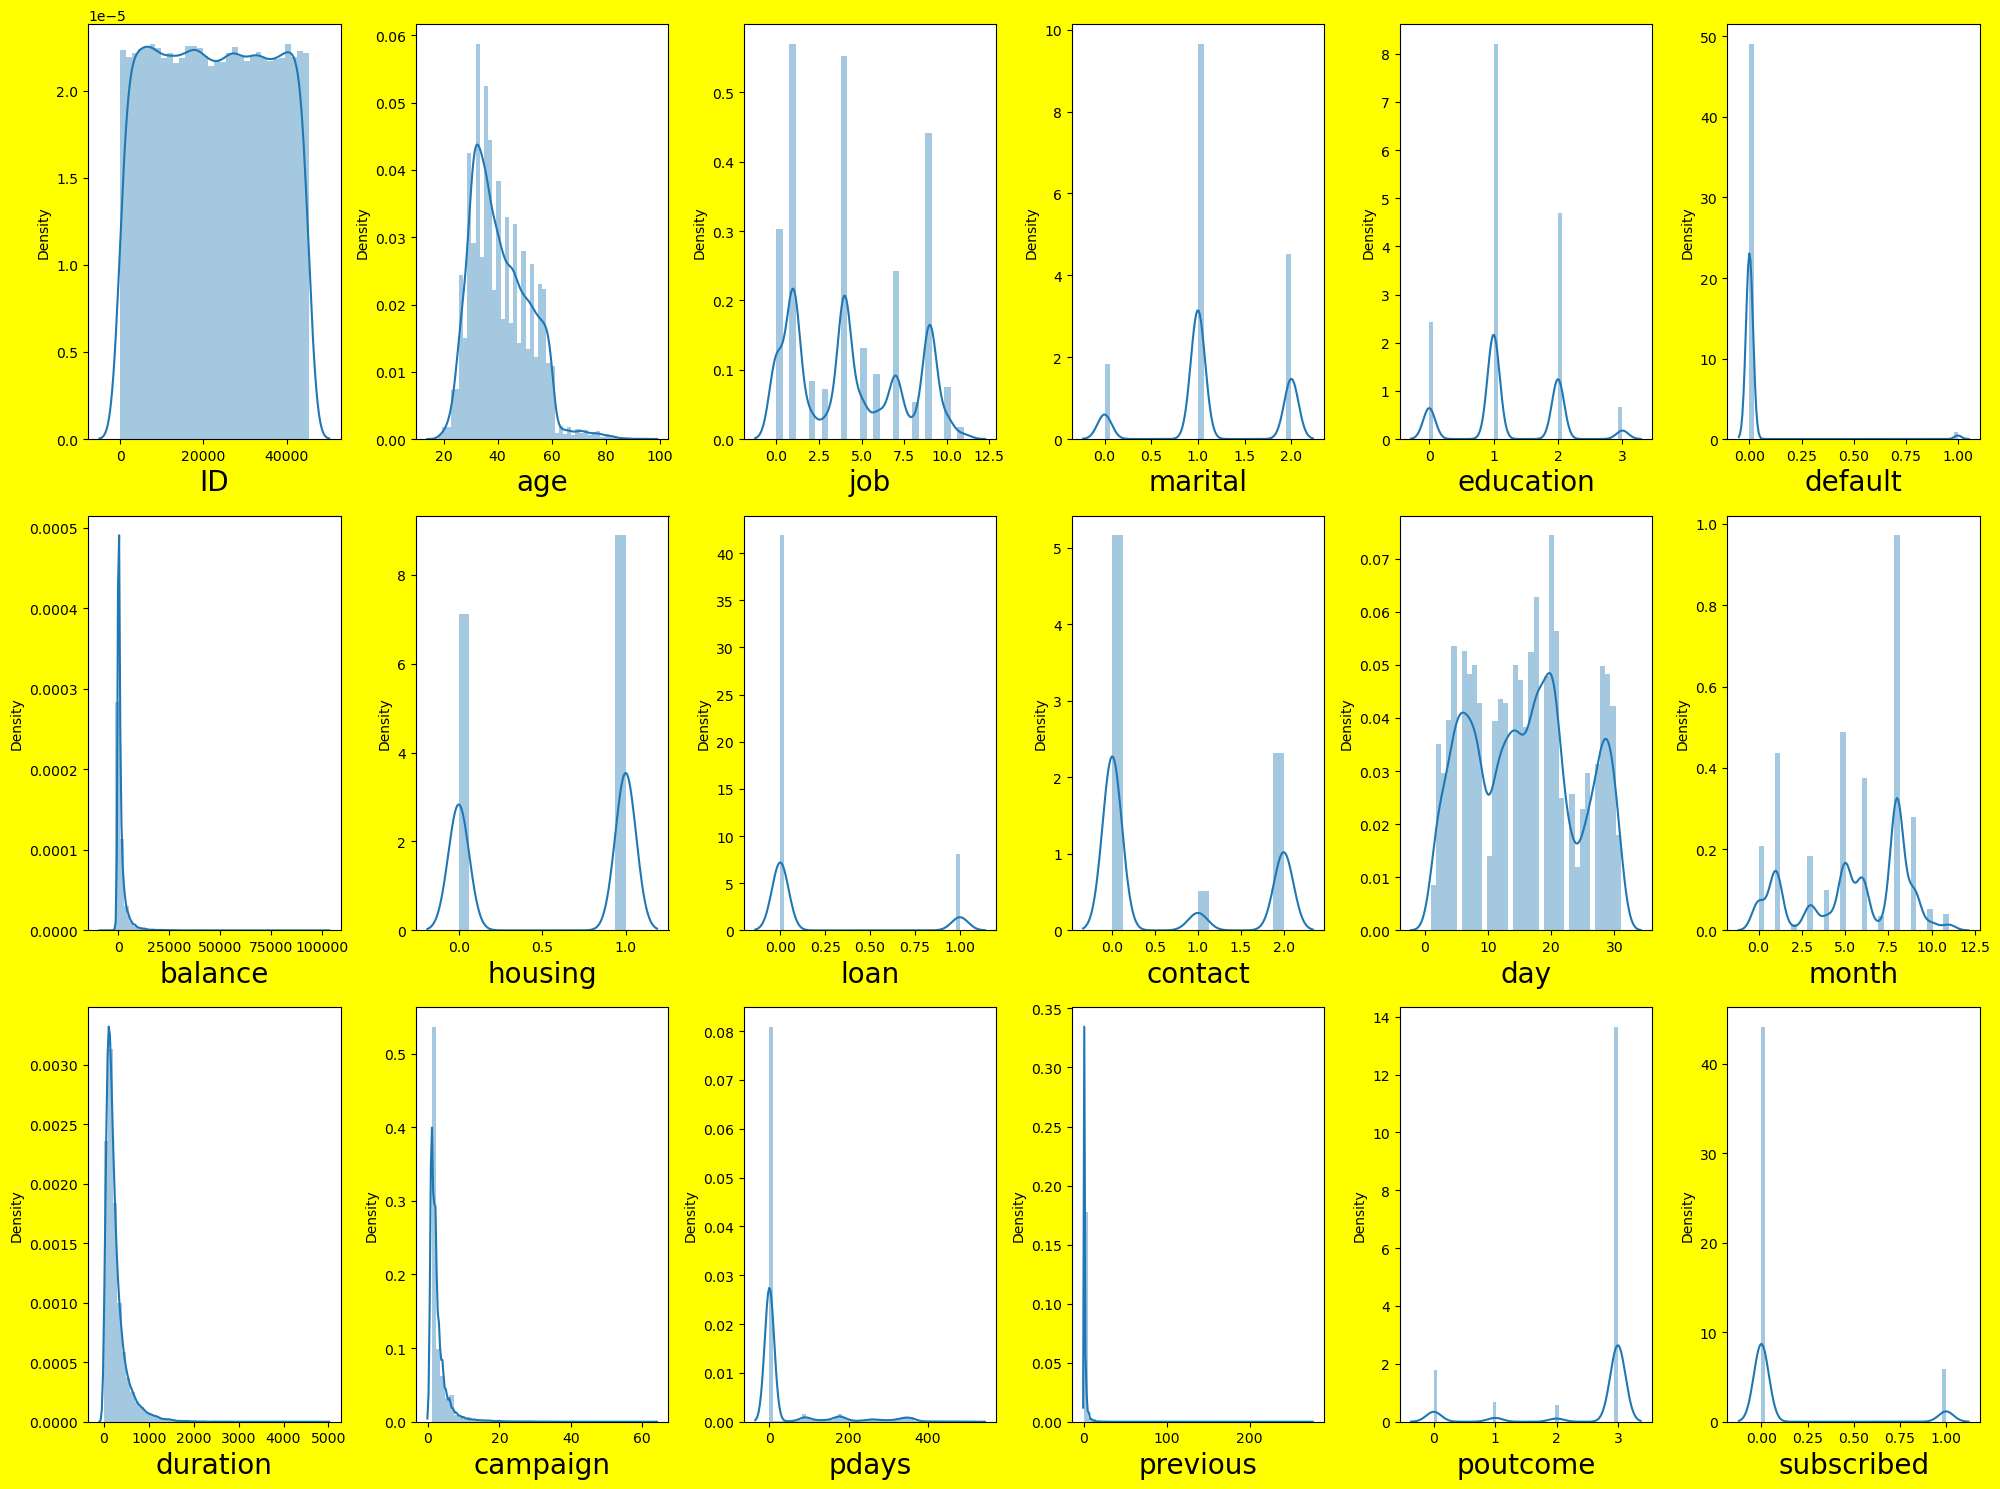

In [51]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in train_df:
    if plotnumber <=18:
        ax = plt.subplot(3,6,plotnumber)
        sns.distplot(train_df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

- It looks like data is not normaly distributed in most of the columns

In [52]:
# Checking description of dataset
train_df.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.065946,0.574272,2.566152,0.117389
std,13075.936990,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,94.878761,2.422529,0.982069,0.321888
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11218.000000,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,0.000000,0.000000,3.000000,0.000000
50%,22519.000000,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,0.000000,0.000000,3.000000,0.000000
75%,33879.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,0.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,508.000000,275.000000,3.000000,1.000000


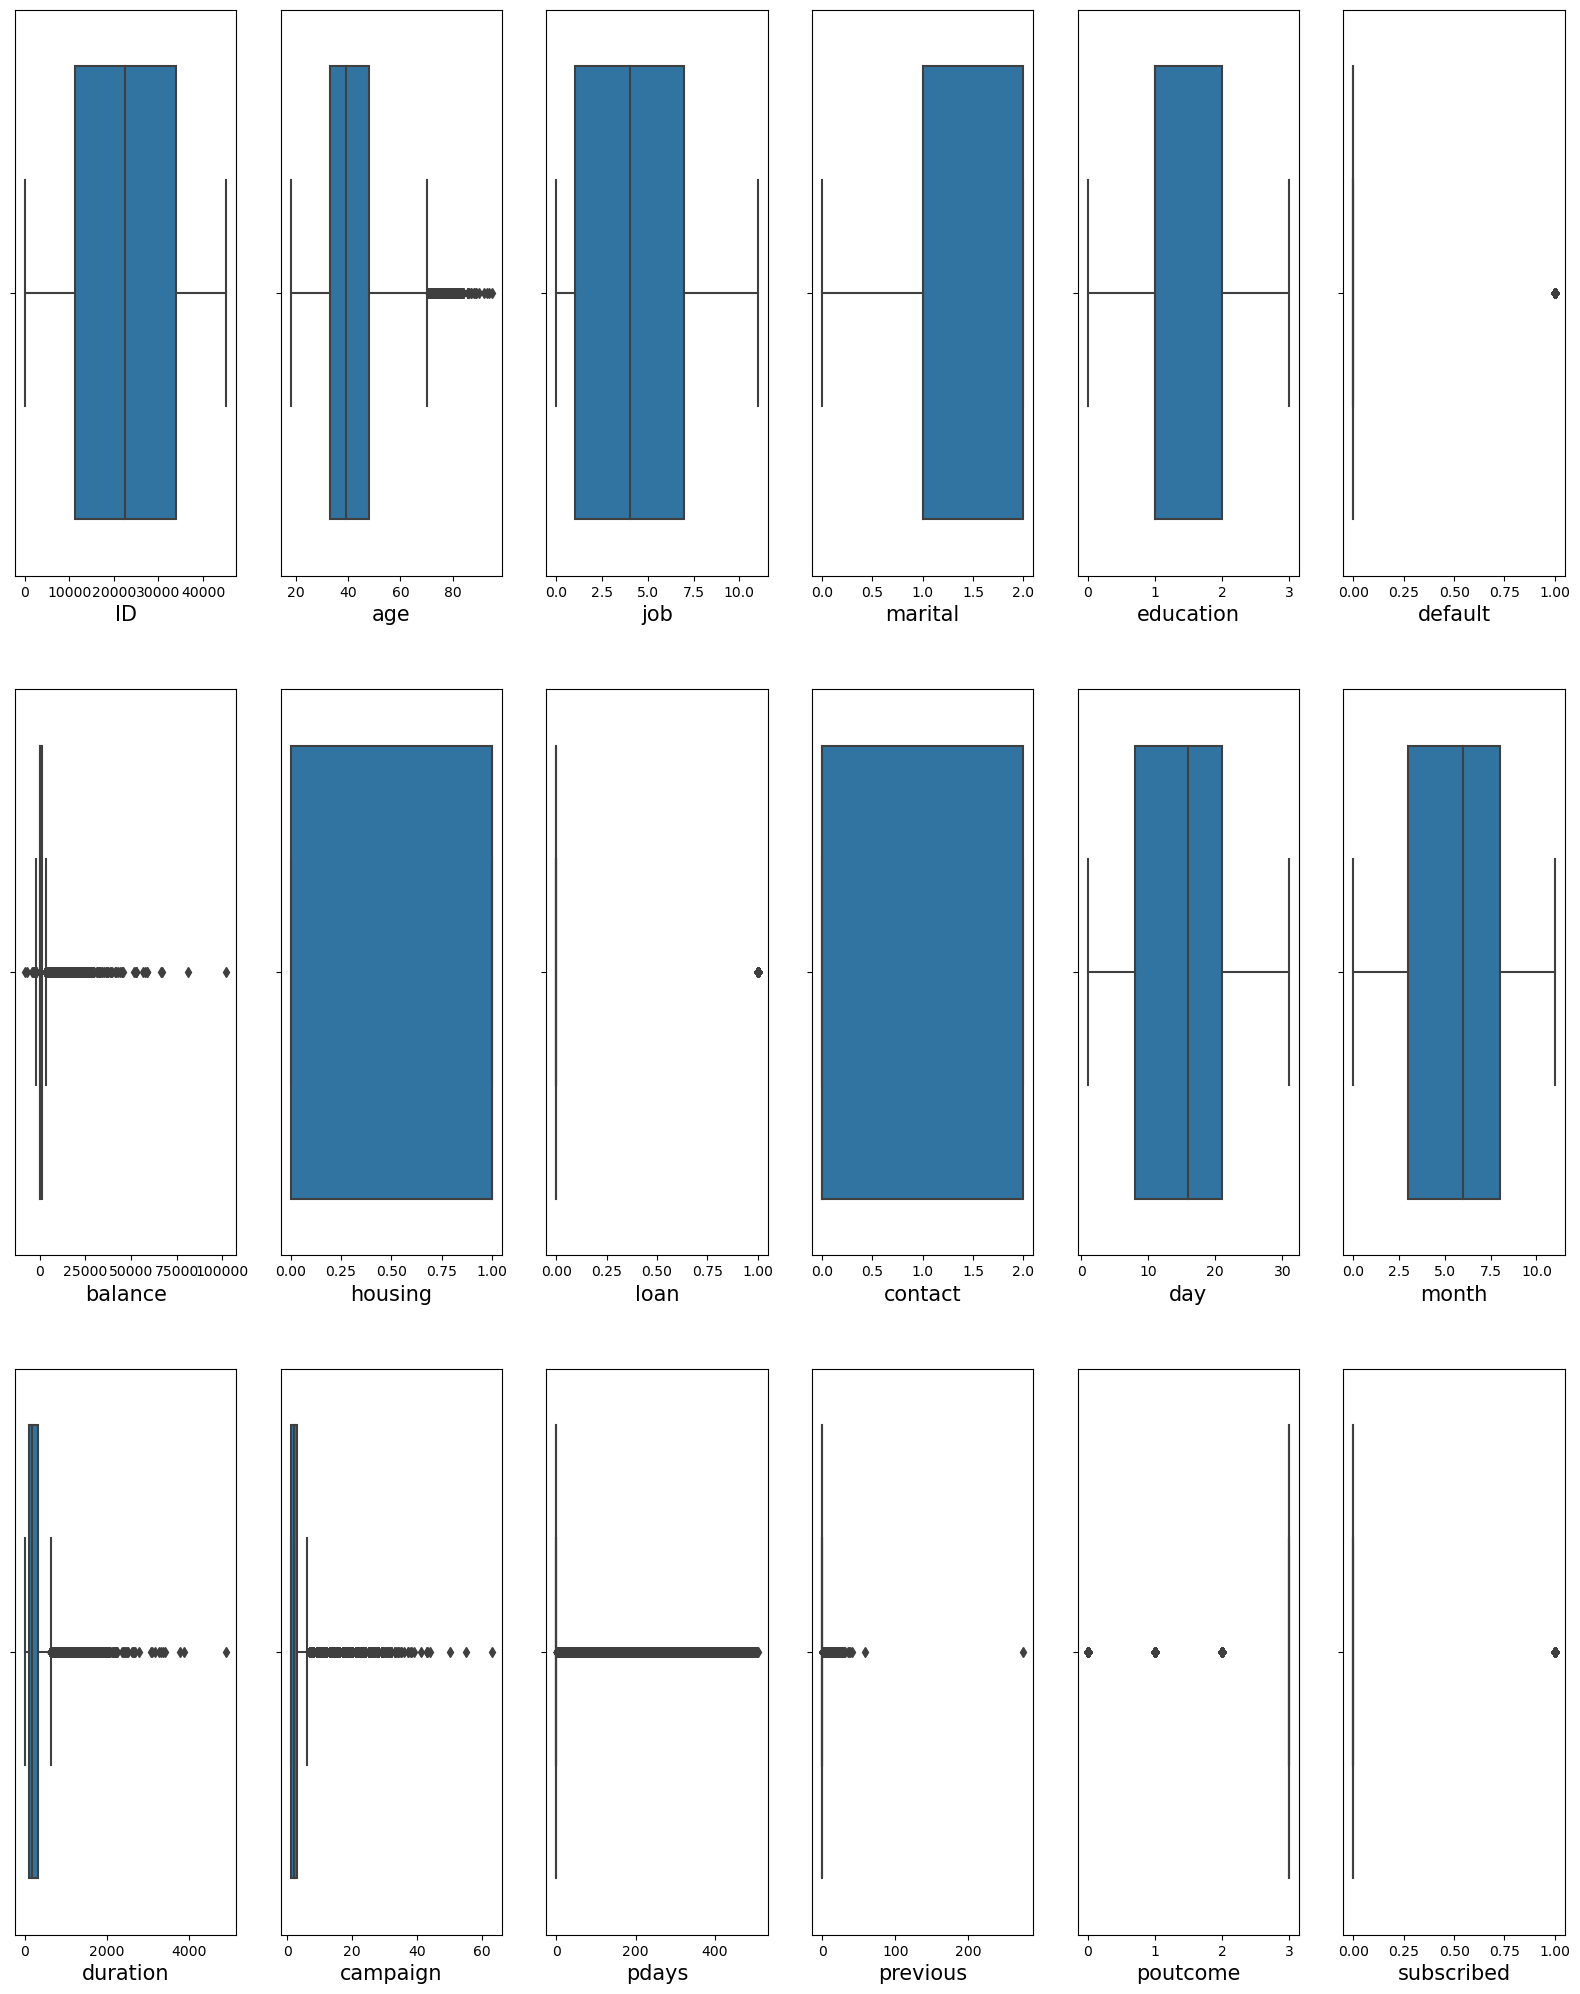

In [48]:
# Now visualize the data using boxplot for getting more idea abot outliers
plt.figure(figsize =(20,25))
graph = 1

for column in train_df:
    if graph <=18:
        plt.subplot(3,6,graph)
        ax=sns.boxplot(train_df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

- From the boxplot, We noticed that,Outliers are present in Age,SibSp,Parch and Fare columns. 

# Removing outliers using z-score

In [53]:
from scipy.stats import zscore
features=train_df[['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome']]
z=np.abs(zscore(features))
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.411752,0.237059,0.441777
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.411752,0.237059,0.441777
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.411752,0.237059,0.441777
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.420902,1.001336,0.576498
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.411752,0.237059,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.411752,0.237059,0.441777
31643,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.411752,0.237059,0.441777
31644,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.411752,0.237059,0.441777
31645,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,3.087505,4.716521,2.613048


In [54]:
threshold=3
print(np.where(z>3))

(array([   10,    21,    26, ..., 31645, 31645, 31646], dtype=int64), array([ 4, 12,  5, ..., 13, 14, 11], dtype=int64))


In [55]:
# Now removing the data above zscore and creating new df
train_df_new=train_df[(z<3).all(axis=1)]
print("Data with outliers::",train_df.shape)
print("Data after removing outliers::",train_df_new.shape)

Data with outliers:: (31647, 18)
Data after removing outliers:: (27430, 18)


In [58]:
a = train_df.shape[0]

In [59]:
b = train_df_new.shape[0]

In [60]:
print('Data Loss Percentage - ',((a-b)/a)*100)

Data Loss Percentage -  13.325117704679748


- It is not affordable data loss now we will check with IQR method


# IQR Method

In [61]:
# 1st Quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

In [62]:
# IQR
IQR = Q3 - Q1
IQR

df2 = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(16003, 18)

In [63]:
print('Data Loss Percentage - ',((train_df.shape[0]-df2.shape[0])/train_df.shape[0])*100)

Data Loss Percentage -  49.432805637185204


- 49.43% is removed using IQR method, Which is not acceptable so we go with Z- score method

- so we are using z-score method

In [64]:
# Now we proceed with new dataset
df=train_df_new
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,0,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,0,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,0,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,79,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,0,2968,0,0,2,20,6,30,4,0,0,3,0
31641,9476,37,9,2,2,0,1309,0,0,2,6,6,442,2,0,0,3,0
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,0,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,0,0,3,1


# Checking For Skewness

In [66]:
df.skew()

ID            0.080260
age           0.437503
job           0.256276
marital      -0.095597
education     0.196371
default       0.000000
balance       2.432011
housing      -0.199612
loan          1.827055
contact       0.690582
day           0.073731
month        -0.470065
duration      1.598786
campaign      2.061886
pdays         2.871844
previous      3.723083
poutcome     -2.521185
subscribed    2.621645
dtype: float64

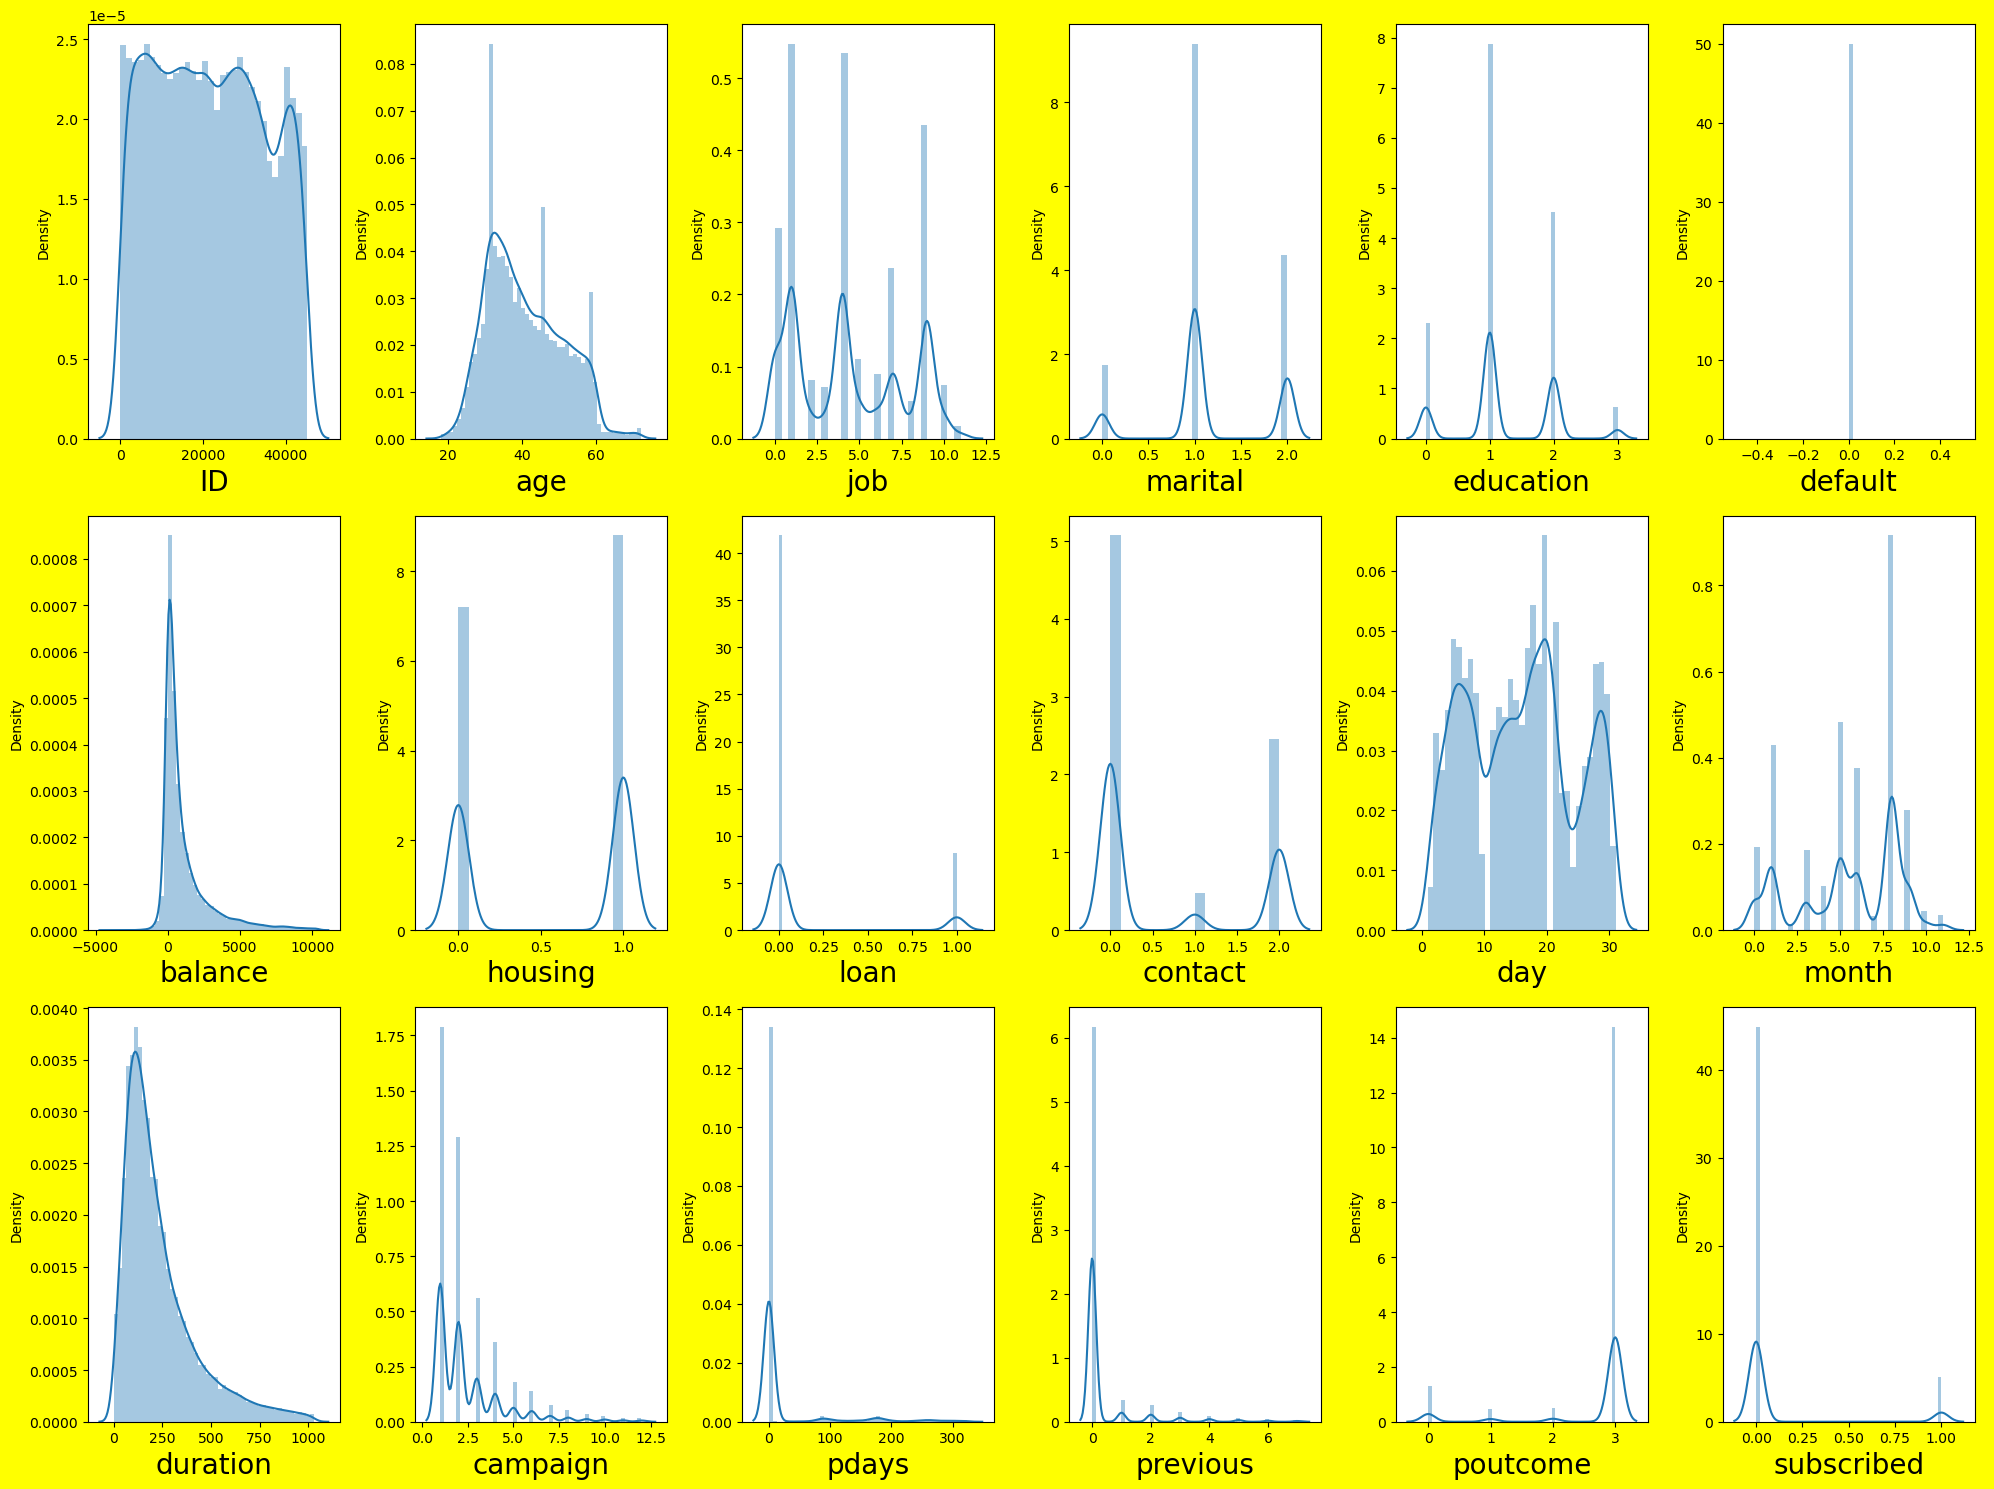

In [67]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <=18:
        ax = plt.subplot(3,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

In [73]:
# Drop Id Column
df.drop('ID',axis=1,inplace=True)

In [84]:
#Drop default beacuse no use of default column for prediction of subcribe
df.drop('default',axis=1,inplace=True)

In [85]:
df.corr()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.030749,-0.410974,-0.101880,0.092752,-0.154536,0.005572,0.030351,-0.010384,-0.042339,-0.025734,0.035110,-0.004716,0.010654,-0.002824,-0.006334
job,-0.030749,1.000000,0.068001,0.171190,0.023657,-0.123491,-0.038461,-0.085997,0.020834,-0.090458,-0.001533,0.003428,0.011293,0.016833,-0.017516,0.037175
marital,-0.410974,0.068001,1.000000,0.113419,0.010783,-0.028873,-0.045674,-0.042204,-0.008668,-0.002699,0.015740,-0.022444,0.012141,0.018225,-0.014481,0.056996
education,-0.101880,0.171190,0.113419,1.000000,0.052639,-0.097467,-0.048148,-0.124148,0.016516,-0.059053,0.000428,-0.007962,0.031546,0.046346,-0.045105,0.075170
balance,0.092752,0.023657,0.010783,0.052639,1.000000,-0.057137,-0.094559,-0.037978,0.009109,0.032095,0.032235,-0.014098,0.042567,0.052474,-0.058742,0.070618
housing,-0.154536,-0.123491,-0.028873,-0.097467,-0.057137,1.000000,0.037871,0.218469,-0.011748,0.277974,0.010705,-0.039317,0.059773,-0.000040,-0.039448,-0.148851
loan,0.005572,-0.038461,-0.045674,-0.048148,-0.094559,0.037871,1.000000,-0.011827,0.011928,0.026207,-0.010667,-0.002493,-0.003590,-0.015079,-0.002133,-0.075404
contact,0.030351,-0.085997,-0.042204,-0.124148,-0.037978,0.218469,-0.011827,1.000000,-0.028752,0.392611,-0.023181,0.002364,-0.235587,-0.212331,0.244775,-0.160073
day,-0.010384,0.020834,-0.008668,0.016516,0.009109,-0.011748,0.011928,-0.028752,1.000000,0.018828,-0.026497,0.131353,-0.052666,-0.047847,0.043019,-0.029708
month,-0.042339,-0.090458,-0.002699,-0.059053,0.032095,0.277974,0.026207,0.392611,0.018828,1.000000,0.009194,-0.121846,-0.044135,-0.004832,0.013248,-0.023403


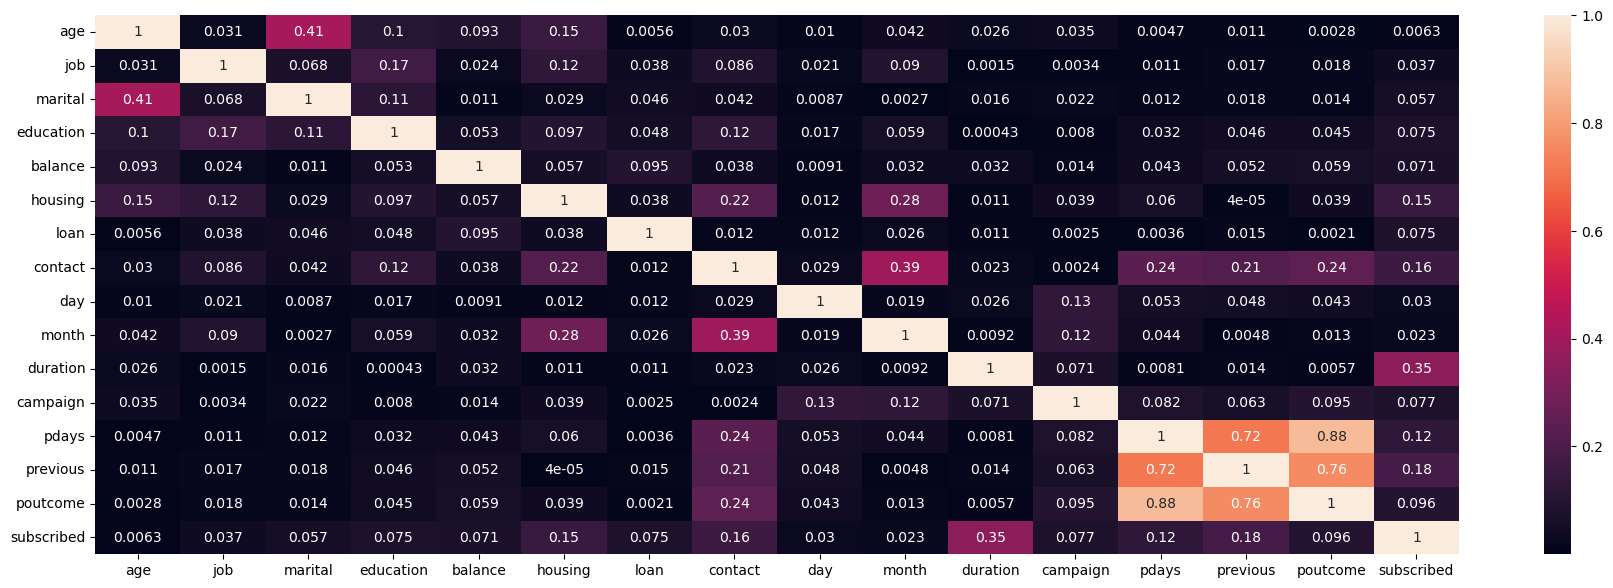

In [86]:
# Plot the heatmap
import matplotlib.pyplot as plt

df_corr=df.corr().abs()
plt.figure(figsize=(22,7))
sns.heatmap(df_corr, annot=True)
plt.show()

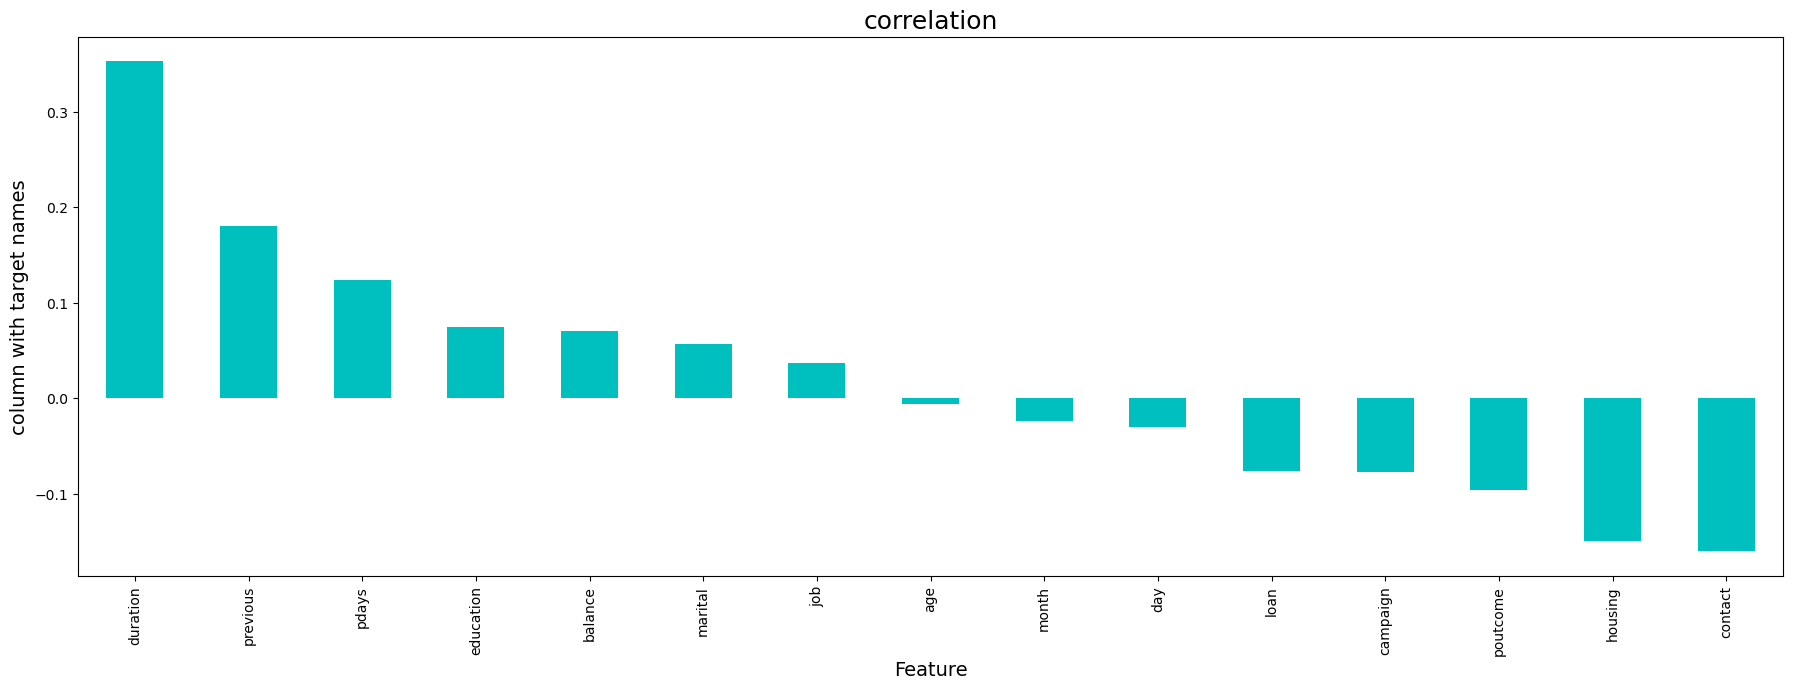

In [87]:
#Checking the columns which are positively and negatively correlated with the quality column

plt.figure(figsize=(22,7))
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- We can see the positive correlated column with Subscribed is duration and education,balance,marital,Job.
- negatively correlated column is contact,housing,loan,campaign.

# diving data in (features)x and (lables)y

In [88]:
x= df.drop(['subscribed'],axis=1)
y=df['subscribed']

In [89]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1,3,1933,0,0,1,19,9,44,2,0,0,3
1,31,11,1,1,3,0,0,0,20,5,91,2,0,0,3
2,27,7,1,1,891,1,0,0,18,5,240,1,0,0,3
3,57,4,0,2,3287,0,0,0,22,6,867,1,79,3,2
4,31,9,1,1,119,1,0,0,4,3,380,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,2968,0,0,2,20,6,30,4,0,0,3
31641,37,9,2,2,1309,0,0,2,6,6,442,2,0,0,3
31642,29,4,2,2,0,1,0,0,12,8,116,2,0,0,3
31643,53,4,0,2,380,0,1,0,5,6,438,2,0,0,3


In [90]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31640    0
31641    0
31642    0
31643    1
31644    0
Name: subscribed, Length: 27430, dtype: int32

# Standardization of data

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.517018,-1.324204,-0.278379,2.373263,0.478165,-1.104768,-0.440938,0.357971,0.374013,1.173992,-1.007886,-0.235576,-0.356926,-0.327476,0.372556
1,-0.958060,2.019999,-0.278379,-0.303104,-0.640323,-1.104768,-0.440938,-0.737060,0.493108,-0.166931,-0.760696,-0.235576,-0.356926,-0.327476,0.372556
2,-1.354073,0.803925,-0.278379,-0.303104,-0.125703,0.905167,-0.440938,-0.737060,0.254918,-0.166931,0.022948,-0.752236,-0.356926,-0.327476,0.372556
3,1.616021,-0.108130,-1.931892,1.035080,1.262846,-1.104768,-0.440938,-0.737060,0.731297,0.168300,3.320566,-0.752236,0.855771,2.558982,-0.785559
4,-0.958060,1.411962,-0.278379,-0.303104,-0.573098,0.905167,-0.440938,-0.737060,-1.412407,-0.837392,0.759258,-0.752236,-0.356926,-0.327476,0.372556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27425,0.229977,-0.108130,1.375134,-0.303104,1.077977,-1.104768,-0.440938,1.453001,0.493108,0.168300,-1.081517,0.797743,-0.356926,-0.327476,0.372556
27426,-0.364041,1.411962,1.375134,1.035080,0.116540,-1.104768,-0.440938,1.453001,-1.174218,0.168300,1.085339,-0.235576,-0.356926,-0.327476,0.372556
27427,-1.156066,-0.108130,1.375134,1.035080,-0.642062,0.905167,-0.440938,-0.737060,-0.459650,0.838761,-0.629212,-0.235576,-0.356926,-0.327476,0.372556
27428,1.220009,-0.108130,-1.931892,1.035080,-0.421841,-1.104768,2.267893,-0.737060,-1.293313,0.168300,1.064301,-0.235576,-0.356926,-0.327476,0.372556


In [92]:
#Checking multicollinearity among features with variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,Score,features
0,1.273268,age
1,1.050237,job
2,1.228530,marital
3,1.067592,education
4,1.033938,balance
5,1.176741,housing
6,1.016784,loan
7,1.323462,contact
8,1.026145,day
9,1.286765,month


- Here we can see that there is no multicollinearity among features as the vif score is under limit<=10.

# Model Building

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


In [94]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is ",maxAccu," on Random_state ",maxRS)

Maximum R2 score is  0.22212446738506897  on Random_state  45


In [95]:
# Splitting data into Train-Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [96]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)

        print('=======================Train result======================')
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')


    elif train==False:
        pred=clf.predict(x_test)

        print('=======================Test Result=======================')
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\nClassification report\n',classification_report(y_test,pred,digits=2))

# 1.Logistic Regression

In [97]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predlr))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[7258  124]
 [ 706  141]]
=======================Train result======================
accuracy score:89.84%
=======================Test Result=======================
accuracy_score:89.91%


Classification report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7382
           1       0.53      0.17      0.25       847

    accuracy                           0.90      8229
   macro avg       0.72      0.57      0.60      8229
weighted avg       0.87      0.90      0.87      8229



In [98]:
# cv score for Logistic Regression
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvlr)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlr)-cvlr)

CV score for Decision Tree Classifier: 0.898067808968283
And Difference between CV and accuracy_score= 0.0010693887471138197


# 2.KNN Model

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predknn))

metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[7164  218]
 [ 683  164]]
=======================Train result======================
accuracy score:89.84%
=======================Test Result=======================
accuracy_score:89.91%


Classification report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7382
           1       0.53      0.17      0.25       847

    accuracy                           0.90      8229
   macro avg       0.72      0.57      0.60      8229
weighted avg       0.87      0.90      0.87      8229



In [101]:
# cv score for KNN Model
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score for KNN Model:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score for KNN Model: 0.8918337586584032
And Difference between CV and accuracy_score= -0.001324583789038769


# 3 Decision Tree Classifier

In [102]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = knn.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,preddt))

metric_score(dt,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(dt,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score



Confusion Matrix
[[7164  218]
 [ 683  164]]
=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:88.05%


Classification report
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      7382
           1       0.42      0.45      0.44       847

    accuracy                           0.88      8229
   macro avg       0.68      0.69      0.68      8229
weighted avg       0.88      0.88      0.88      8229



In [104]:
# cv score for Decision Tree Classifier
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvdt)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddt)-cvdt)

CV score for Decision Tree Classifier: 0.8809697411593147
And Difference between CV and accuracy_score= 0.009539433710049727


# 4 RandomForestClassifier

In [105]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predrfc))

metric_score(rfc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score



Confusion Matrix
[[7262  120]
 [ 581  266]]
=======================Train result======================
accuracy score:99.99%
=======================Test Result=======================
accuracy_score:91.48%


Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7382
           1       0.69      0.31      0.43       847

    accuracy                           0.91      8229
   macro avg       0.81      0.65      0.69      8229
weighted avg       0.90      0.91      0.90      8229



In [106]:
# cv score for RandomForestClassifier
cvrfc=cross_val_score(rfc,x,y,cv=5).mean()
print('CV score for RandomForestClassifier:',cvrfc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrfc)-cvrfc)

CV score for RandomForestClassifier: 0.9135617936565804
And Difference between CV and accuracy_score= 0.0012516709199172915


# 5 Support vector classifier

In [107]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predsvc))

metric_score(svc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(svc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[7382    0]
 [ 847    0]]
=======================Train result======================
accuracy score:89.77%
=======================Test Result=======================
accuracy_score:89.71%


Classification report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      7382
           1       0.00      0.00      0.00       847

    accuracy                           0.90      8229
   macro avg       0.45      0.50      0.47      8229
weighted avg       0.80      0.90      0.85      8229



In [108]:
# cv score for SVC
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score for SVC:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score for SVC: 0.8975209624498725
And Difference between CV and accuracy_score= -0.00044962935958203776


# 6 ADA BOOST CLASSIFIER

In [109]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
predadb = adb.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predadb))

metric_score(adb,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(adb,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[7211  171]
 [ 556  291]]
=======================Train result======================
accuracy score:90.75%
=======================Test Result=======================
accuracy_score:91.17%


Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7382
           1       0.63      0.34      0.44       847

    accuracy                           0.91      8229
   macro avg       0.78      0.66      0.70      8229
weighted avg       0.90      0.91      0.90      8229



In [110]:
# cv score for ADA BOOST CLASSIFIER
cvadb=cross_val_score(adb,x,y,cv=10).mean()
print('CV score for ADA BOOST CLASSIFIER:',cvadb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predadb)-cvadb)

CV score for ADA BOOST CLASSIFIER: 0.9079475027342324
And Difference between CV and accuracy_score= 0.0037064041803379633


# 7 BAGGING CLASSIFIER

In [111]:
bgc=BaggingClassifier()
bgc.fit(x_train,y_train)
predbgc = bgc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predbgc))

metric_score(bgc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(bgc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[7203  179]
 [ 549  298]]
=======================Train result======================
accuracy score:99.25%
=======================Test Result=======================
accuracy_score:91.15%


Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7382
           1       0.62      0.35      0.45       847

    accuracy                           0.91      8229
   macro avg       0.78      0.66      0.70      8229
weighted avg       0.90      0.91      0.90      8229



In [112]:
# cv score for BAGGING CLASSIFIER
cvbgc=cross_val_score(bgc,x,y,cv=10).mean()
print('CV score for BAGGING CLASSIFIER:',cvbgc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predbgc)-cvbgc)

CV score for BAGGING CLASSIFIER: 0.9087130878600073
And Difference between CV and accuracy_score= 0.0028192976060275043


# 8 Gradient Boosting classifier

In [113]:
grbc=GradientBoostingClassifier()
grbc.fit(x_train,y_train)
predgrbc = grbc.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predgrbc))

metric_score(grbc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(grbc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


Confusion Matrix
[[7233  149]
 [ 550  297]]
=======================Train result======================
accuracy score:91.89%
=======================Test Result=======================
accuracy_score:91.51%


Classification report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7382
           1       0.67      0.35      0.46       847

    accuracy                           0.92      8229
   macro avg       0.80      0.67      0.71      8229
weighted avg       0.90      0.92      0.90      8229



In [114]:
# cv score for Gradient Boosting classifier
cvgrbc=cross_val_score(grbc,x,y,cv=10).mean()
print('CV score for Gradient Boosting classifier:',cvgrbc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgrbc)-cvgrbc)

CV score for Gradient Boosting classifier: 0.9121035362741525
And Difference between CV and accuracy_score= 0.0029529711994165098


In [115]:
#compairing Model
models = [('Logistic Regression',accuracy_score(y_test,predlr),cvlr),
          ('KNN Model', accuracy_score(y_test,predknn), cvknn),
          ('Decision Tree Classifier', accuracy_score(y_test,preddt), cvdt),
          ('RandomForestClassifier', accuracy_score(y_test,predrfc), cvrfc),   
          ('SVC', accuracy_score(y_test,predsvc), cvsvc),   
          ('ADA BOOST CLASSIFIER', accuracy_score(y_test,predadb), cvadb),   
          ('BAGGING CLASSIFIER', accuracy_score(y_test,predbgc), cvbgc), 
          ('Gradient Boosting classifier', accuracy_score(y_test,predgrbc), cvgrbc)
          ]

In [116]:
predict = pd.DataFrame(data = models, columns=[ 'Model','Accuracy Score', 'Cross-Validation'])
predict
 


,Model,Accuracy Score,Cross-Validation
0,Logistic Regression,0.899137,0.898068
1,KNN Model,0.890509,0.891834
2,Decision Tree Classifier,0.890509,0.880970
3,RandomForestClassifier,0.914813,0.913562
4,SVC,0.897071,0.897521
5,ADA BOOST CLASSIFIER,0.911654,0.907948
6,BAGGING CLASSIFIER,0.911532,0.908713
7,Gradient Boosting classifier,0.915057,0.912104


# We choose Random Forest classifier for hyperparameter tuning because training and test accuracy is good

# HYPER PARAMETER TUNING

In [120]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [122]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'],'n_estimators': [100],'oob_score': ['False'],}

GCV = GridSearchCV(estimator =rfc,param_grid=parameters,cv=8,scoring='accuracy')
GCV.fit(x_train,y_train) #fitting data into the model
GCV.best_params_ #printing the best parameters found by the GridSearchCV

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'oob_score': 'False'}

In [123]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

0.915056507473569

# Our best model with best parameters has given an excellent accuracy of 91%

# roc auc curve

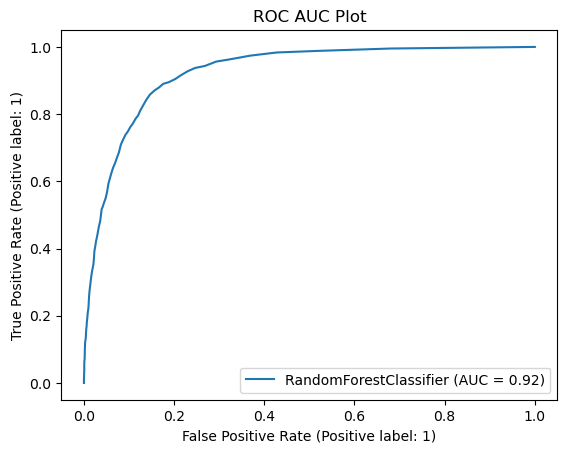

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Saving the best classification model

In [125]:
import pickle
filename = 'bank_marketing_prediction.pkl'
pickle.dump(GCV,open(filename,'wb'))

In [126]:
loaded_model = pickle.load(open('bank_marketing_prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

91.50565074735691


# Prediction with test data

In [129]:
X_test=test_df
X_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [131]:
#converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [133]:
cols=['job','marital','education','default','housing','loan','contact','month','pdays','poutcome']
test_df[cols] = test_df[cols].apply(LabelEncoder().fit_transform)
test_df.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
12428,32024,34,4,1,2,0,703,1,0,0,14,0,342,1,0,0,3


In [137]:
# Drop Id Column,Default column
test_df.drop('ID',axis=1,inplace=True)
test_df.drop('default',axis=1,inplace=True)

In [138]:
X_test = test_df

In [139]:
y_pred = loaded_model.predict(X_test)  # For classification

# Save predictions
test_df['predicted_subscription'] = y_pred


In [140]:
test_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,predicted_subscription
0,32,7,1,1,118,1,0,0,15,8,20,6,0,0,3,0
1,78,5,0,0,2787,0,0,1,1,5,372,1,0,0,3,1
2,31,6,2,2,144,1,0,2,16,8,676,1,0,0,3,0
3,57,7,2,0,3777,1,0,1,13,8,65,2,0,0,3,0
4,45,1,0,1,-705,0,1,2,3,5,111,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,45,0,0,0,28,1,148,4,0,0,3,0
13560,54,1,1,0,2281,1,0,2,20,6,158,1,0,0,3,0
13561,35,5,1,0,285,1,0,0,29,4,136,1,0,0,3,0
13562,29,0,2,1,464,0,0,0,9,9,208,2,62,3,2,1


# The prediction results indicated that Random Forest Classifier model achieved excellent prediction.